In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

sns.set(style='white', rc={'figure.figsize':(12,3)})
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
# font_name = fm.FontProperties(fname=font_path,
#                              size=15).get_name()
# plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안보이게

# 2. 데이터 다운받아, 서울과 부산데이터만 df변수에 읽어온다

In [42]:
# 서울 소상공인 데이터
df_seoul = pd.read_csv('d:/ai/downloads/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv')
df_seoul.shape

(540517, 39)

In [43]:
pd.options.display.max_columns = 39 # 최대 출력될 컬럼수 셋팅

In [44]:
df_seoul.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [45]:
# 부산 소상공인 데이터
df_busan = pd.read_csv('d:/ai/downloads/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_부산_202503.csv')
df_busan.shape

(155537, 39)

In [46]:
df_busan.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700021262,경희윤한의원,NaN,Q1,보건의료,Q102,의원,Q10211,한의원,Q86203,한의원,26,부산광역시,26530,사상구,26530600,덕포1동,2653010300,덕포동,2653010300104260020,1,대지,426.0,20.0,부산광역시 사상구 덕포동 426-20,265303132023,부산광역시 사상구 사상로,272,NaN,2653010300104260020017160,NaN,부산광역시 사상구 사상로 272,617816,46954,NaN,NaN,NaN,128.982555,35.169059


In [47]:
print(df_seoul.columns)
print(df_busan.columns)

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [48]:
# 부산데이터와 서울데이터의 컬럼명 비교
np.all(df_seoul.columns == df_busan.columns)

True

In [49]:
# 부산데이터와 서울데이터의 컬럼과 타입들 비교 확인
df_seoul.dtypes == df_busan.dtypes

상가업소번호        True
상호명           True
지점명           True
상권업종대분류코드     True
상권업종대분류명      True
상권업종중분류코드     True
상권업종중분류명      True
상권업종소분류코드     True
상권업종소분류명      True
표준산업분류코드      True
표준산업분류명       True
시도코드          True
시도명           True
시군구코드         True
시군구명          True
행정동코드         True
행정동명          True
법정동코드         True
법정동명          True
지번코드          True
대지구분코드        True
대지구분명         True
지번본번지         True
지번부번지         True
지번주소          True
도로명코드         True
도로명           True
건물본번지        False
건물부번지         True
건물관리번호        True
건물명           True
도로명주소         True
구우편번호         True
신우편번호         True
동정보           True
층정보           True
호정보           True
경도            True
위도            True
dtype: bool

In [50]:
# 건물본번지 컬럼의 타입이 다름 확인
df_seoul['건물본번지'].dtype # float64
df_busan['건물본번지'].dtype # int64

dtype('int64')

In [51]:
df_seoul['건물본번지'].isna().sum()

1

In [52]:
# df = 부산데이터+서울데이터
df = pd.concat([df_seoul, df_busan]).reset_index(drop=True)
df.index

RangeIndex(start=0, stop=696054, step=1)

In [55]:
del df_seoul, df_busan

# 3. df 데이터 셋의 결측치 및 시각화
## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.

In [58]:
# df 상위3줄
df.head(3)
df.loc[:2]
df.iloc[:3]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786


In [60]:
# df 하위 3줄
df.tail(3)
df.iloc[-3:]
df[-3:]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
696051,MA0101202502A0114732,지안영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,일반 교과학원,26,부산광역시,26350,해운대구,26350552,좌2동,2635010700,좌동,2635010700114850004,1,대지,1485.0,4.0,부산광역시 해운대구 좌동 1485-4,263503133010,부산광역시 해운대구 세실로,31.0,NaN,2635010700114850004026754,대승프라임,부산광역시 해운대구 세실로 31,612842,48111,NaN,NaN,NaN,129.179075,35.167826
696052,MA0101202502A0114738,히어로스포츠,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,기타 스포츠 교육기관,26,부산광역시,26530,사상구,26530660,주례2동,2653010600,주례동,2653010600100740025,1,대지,74.0,25.0,부산광역시 사상구 주례동 74-25,265304006063,부산광역시 사상구 가야대로366번길,22.0,NaN,2653010600100740025010100,NaN,부산광역시 사상구 가야대로366번길 22,617833,47006,NaN,3,NaN,129.012518,35.150000
696053,MA0101202502A0114753,안목,부산역점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,26,부산광역시,26170,동구,26170530,초량3동,2617010100,초량동,2617010100112000004,1,대지,1200.0,4.0,부산광역시 동구 초량동 1200-4,261704181416,부산광역시 동구 중앙대로214번길,3.0,10.0,2617010100112000004006724,NaN,부산광역시 동구 중앙대로214번길 3-10,601838,48733,NaN,1,NaN,129.041453,35.116696


## ②	df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

## ③	결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)

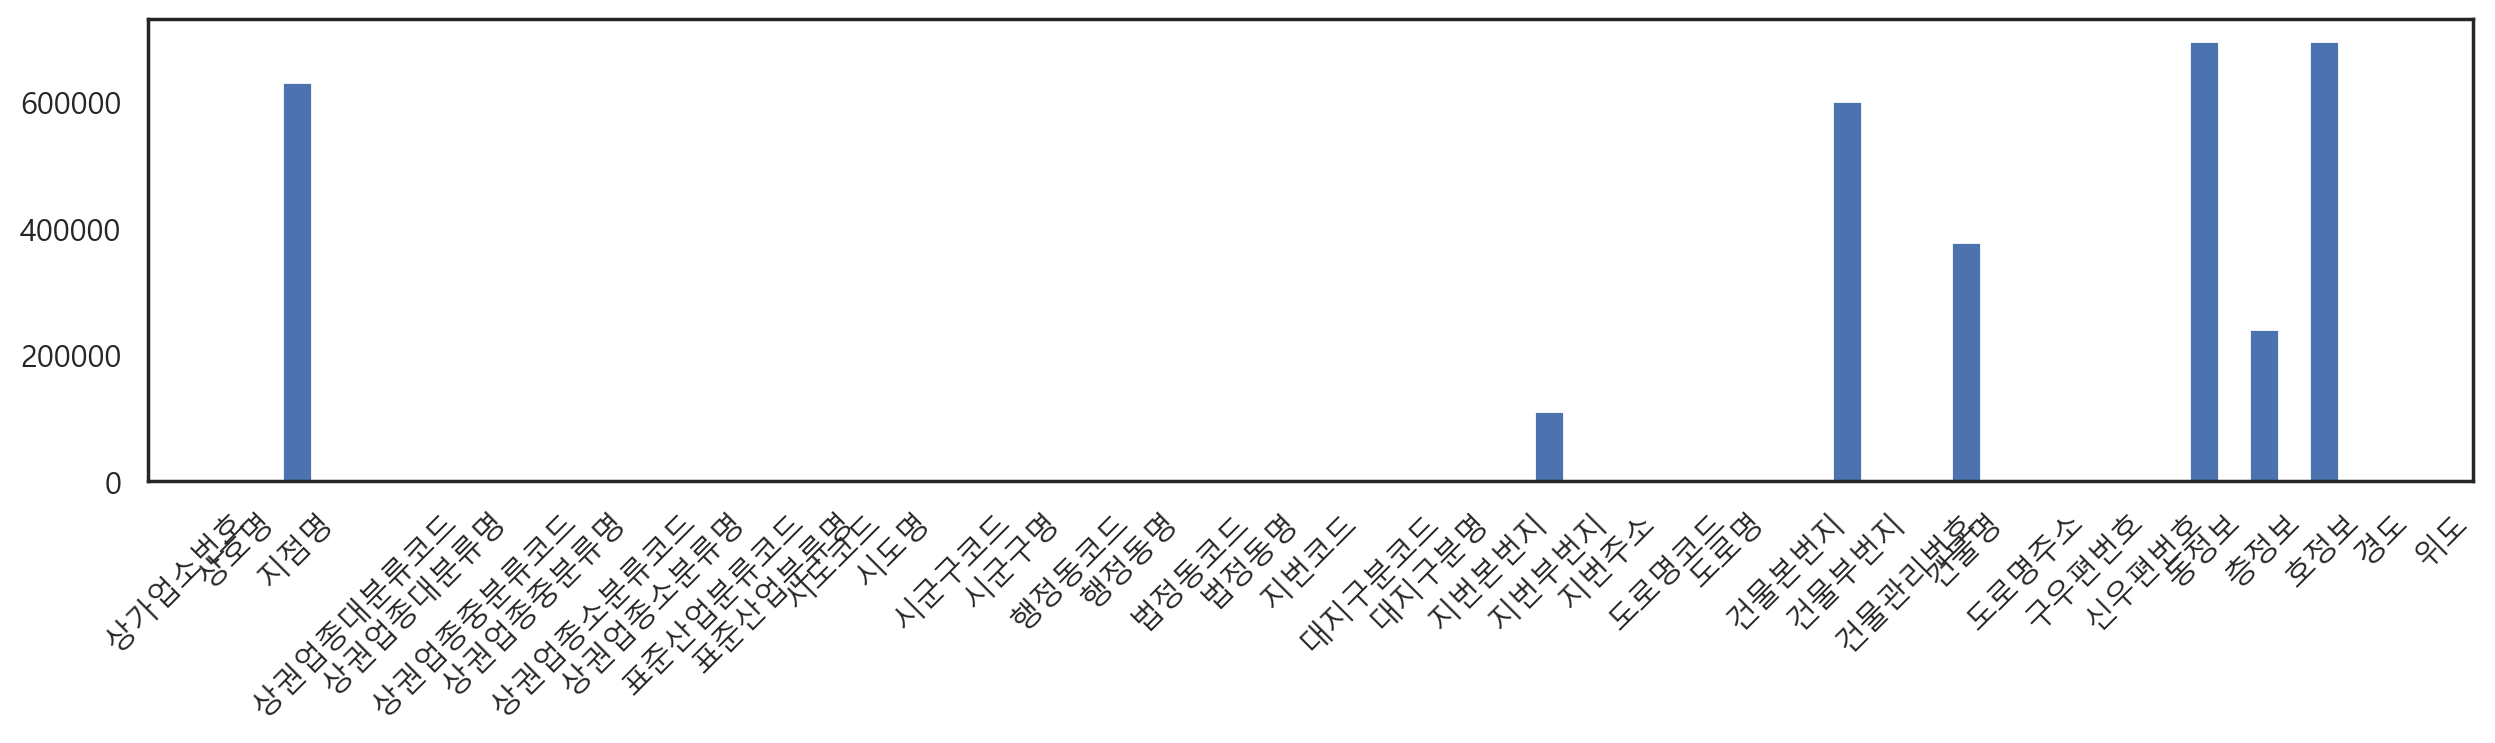

In [6]:
# 열별 결측치 갯수 확인
missing_cnt = df.isna().sum()
# missing_cnt.plot(kind='bar')
missing_cnt.plot.bar(figsize=(15,3), rot=45)
plt.show()

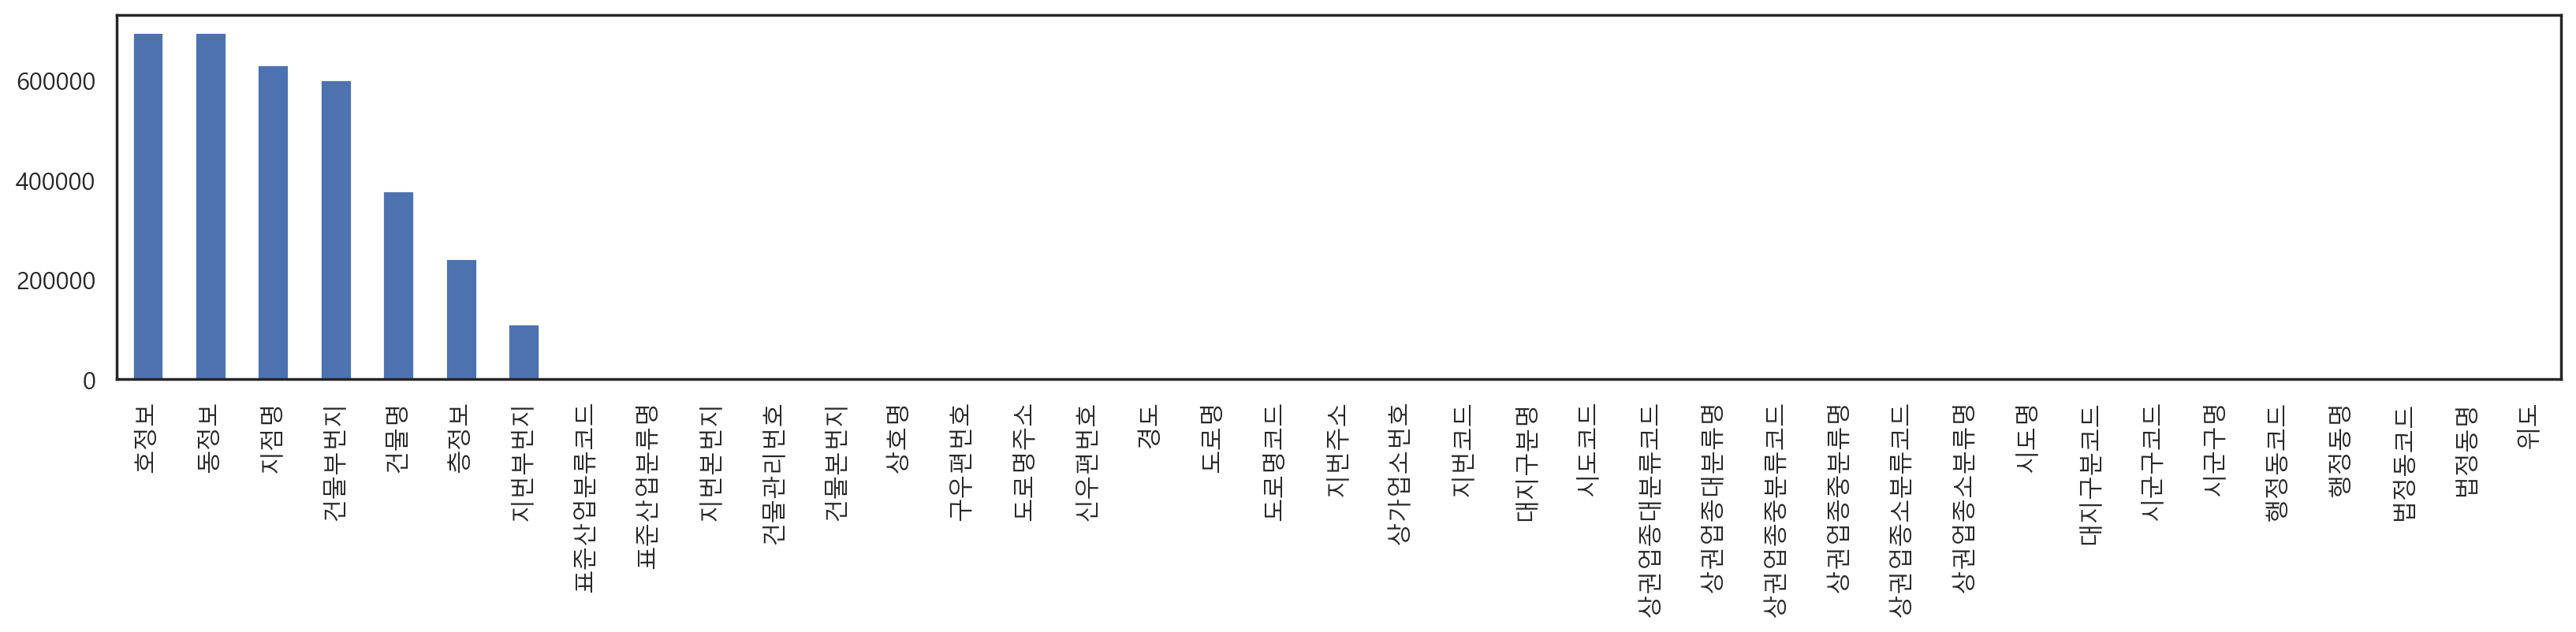

In [78]:
missing_cnt_sorted = missing_cnt.sort_values(ascending=False)
missing_cnt_sorted.plot(kind='bar', figsize=(20,3))
plt.show()

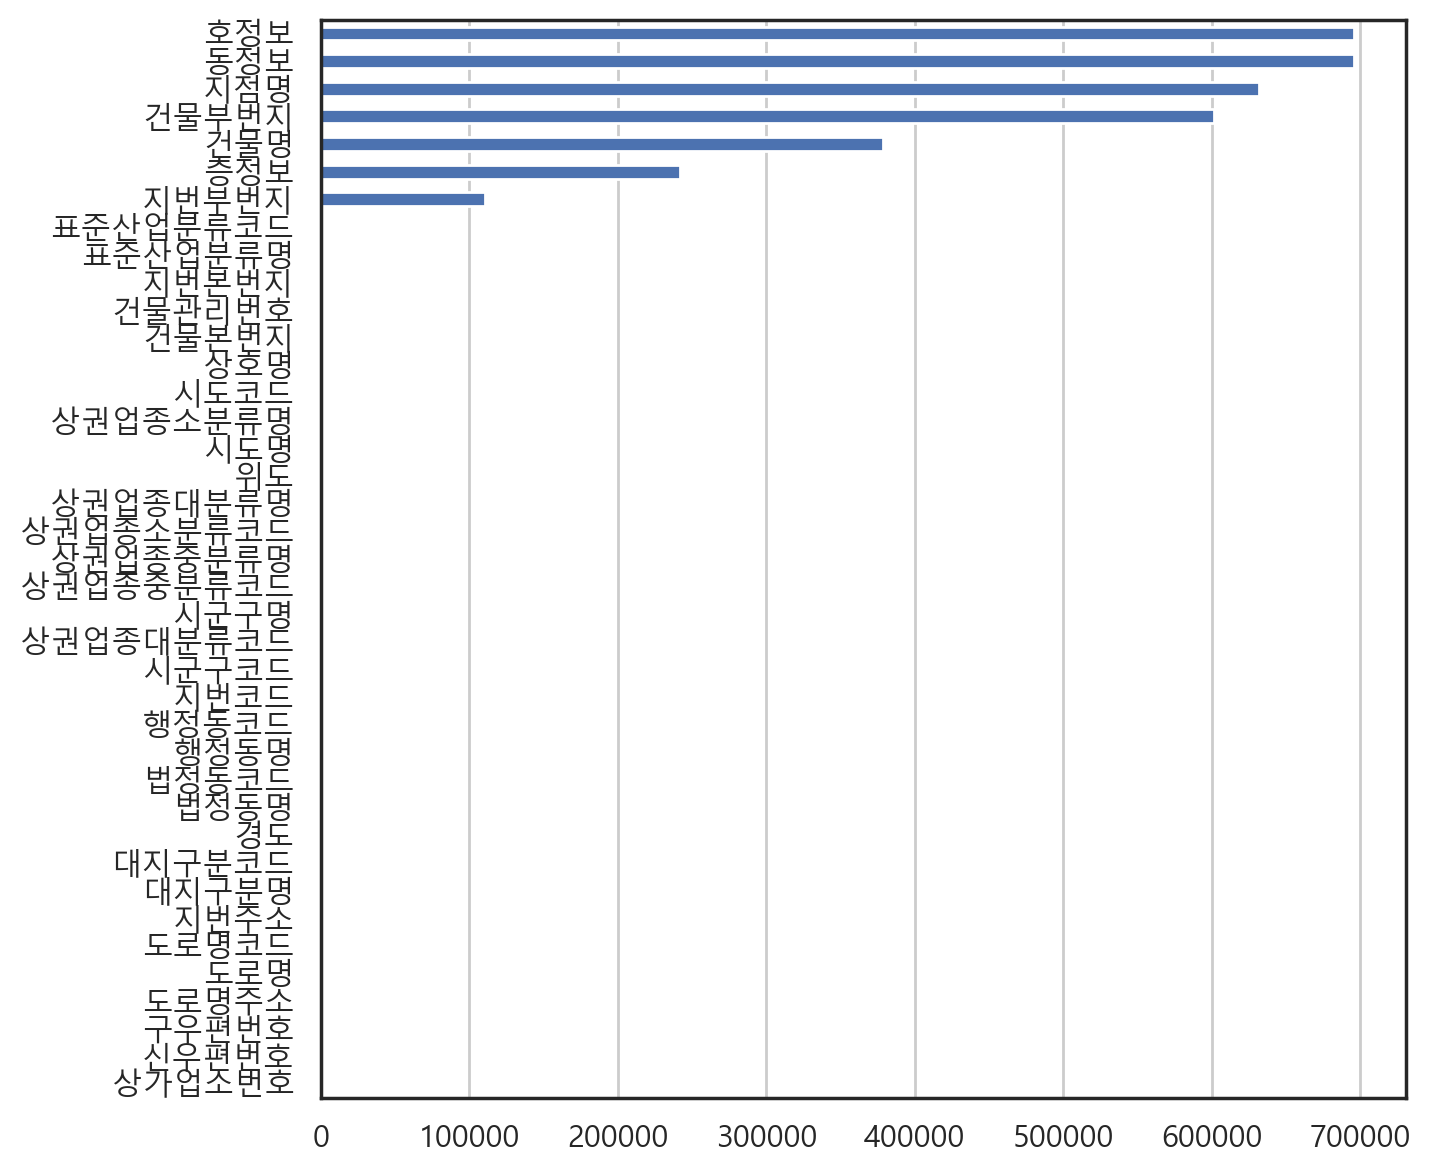

In [82]:
missing_cnt.sort_values().plot(kind='barh', figsize=(7,7))
plt.grid(axis='x')
plt.show()

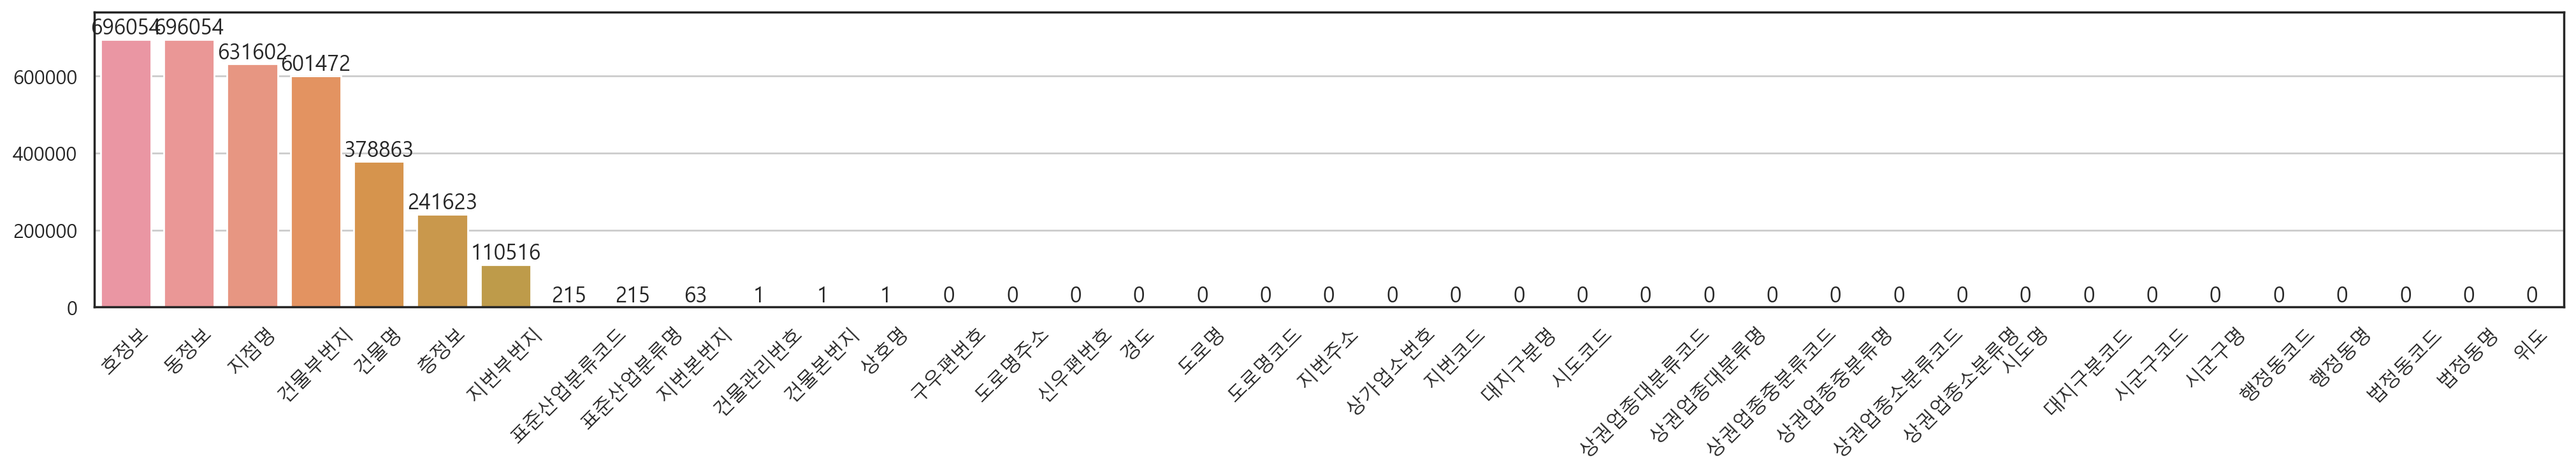

In [97]:
plt.figure(figsize=(25,3))
sns.barplot(x=missing_cnt_sorted.index,
           y=missing_cnt_sorted)
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, v in enumerate(missing_cnt_sorted):
    plt.text(i, v, v, va='bottom', ha='center')
plt.ylim([0,missing_cnt_sorted.max()+70000])
plt.show()

## ④ 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

In [101]:
only_missing_cnt = missing_cnt[missing_cnt!=0]

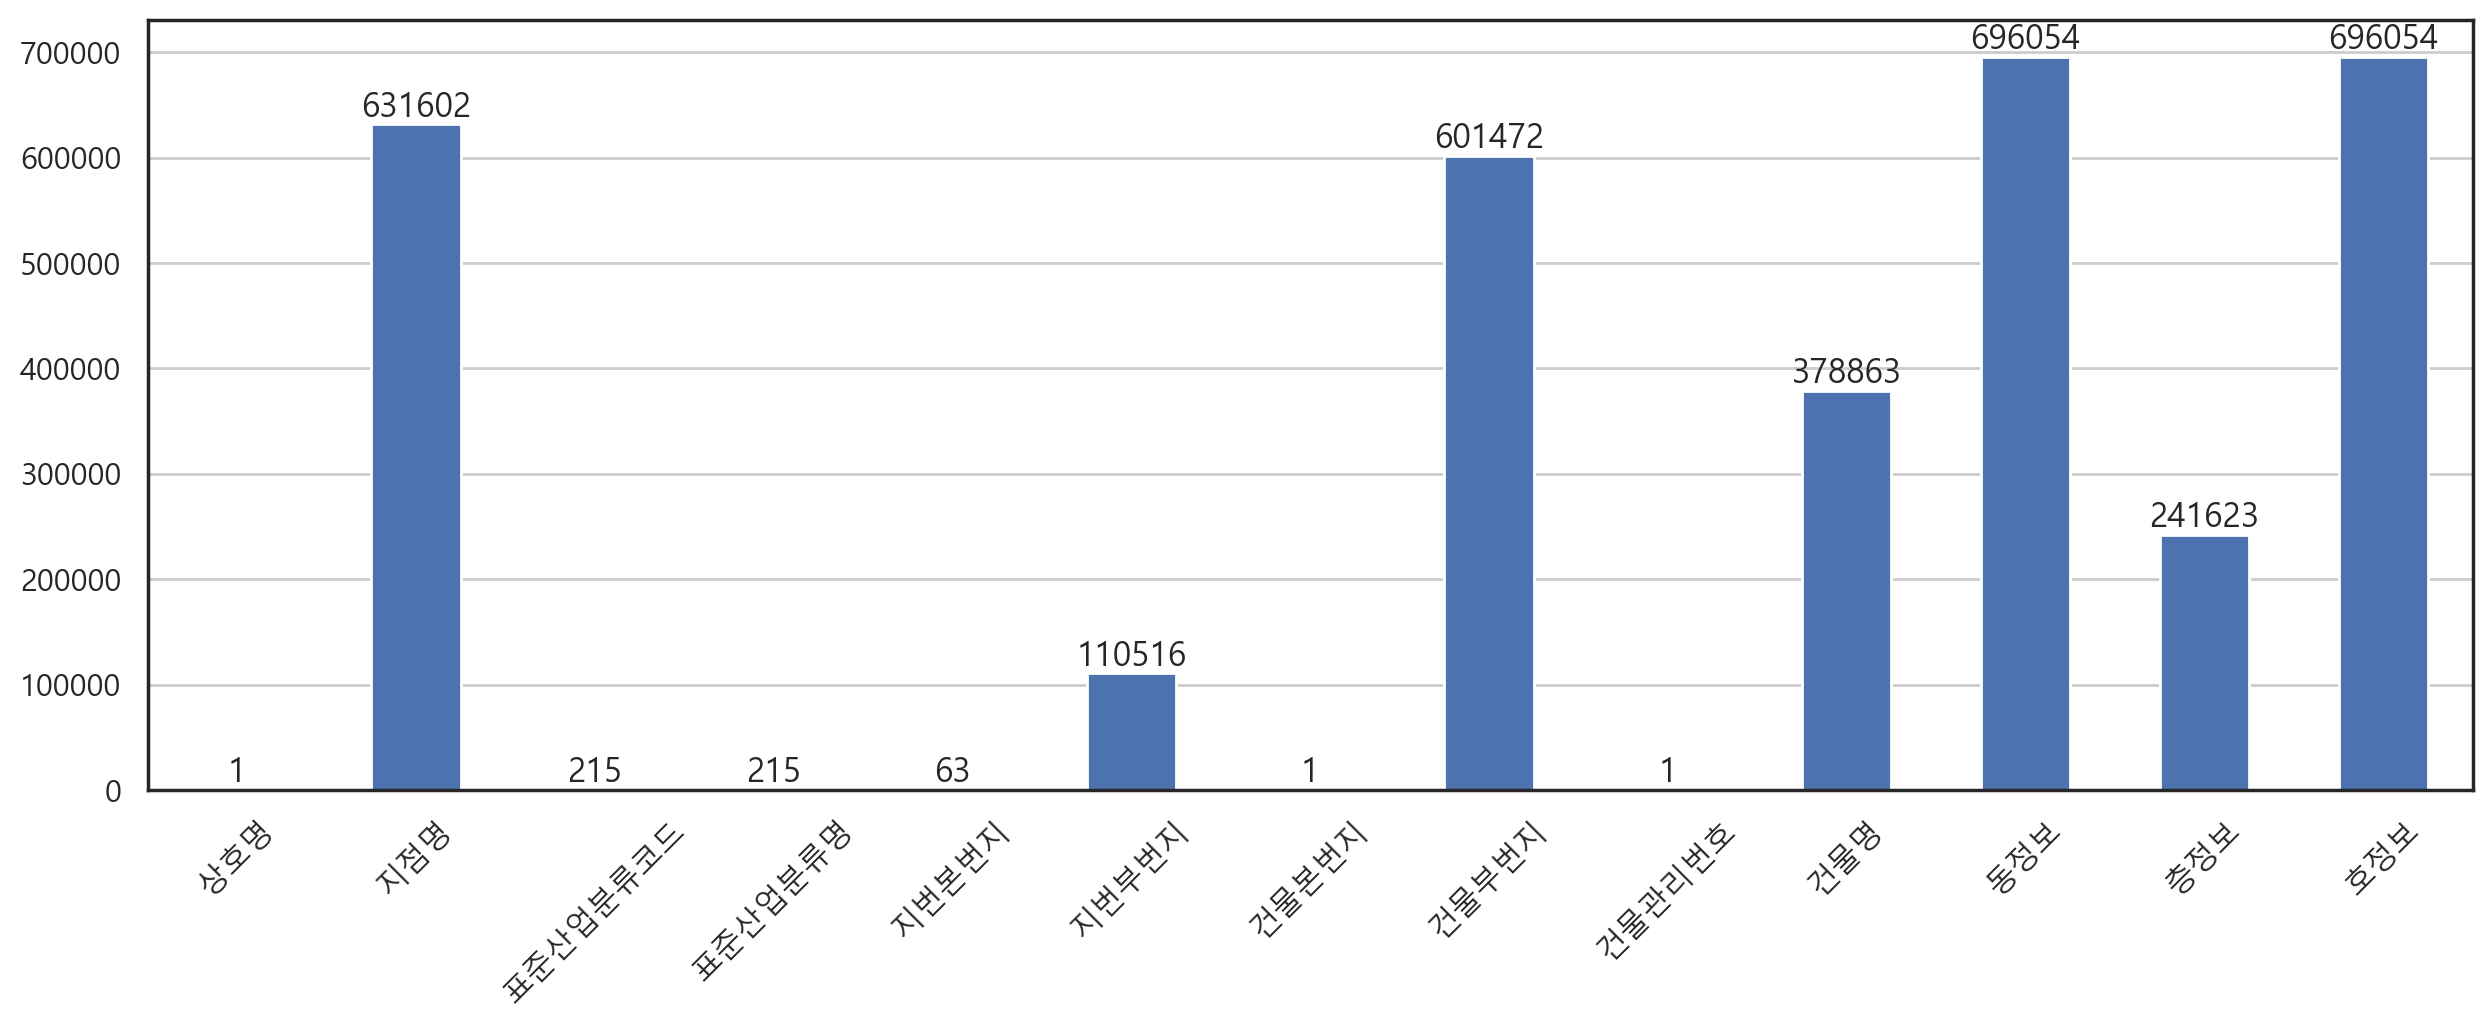

In [108]:
only_missing_cnt.plot.bar(figsize=(15,5), rot=45)
for i, v in enumerate(only_missing_cnt):
    plt.text(i, v, v, va='bottom', ha='center')
plt.grid(axis='y')
plt.show()

## ⑤ missingno 라이브러리로 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python](https://github.com/ResidentMario/missingno)

* 위의 사이트를 열어 사용법 확인
`pip install missingno`

In [8]:
df.shape # 207.1MB

(696054, 39)

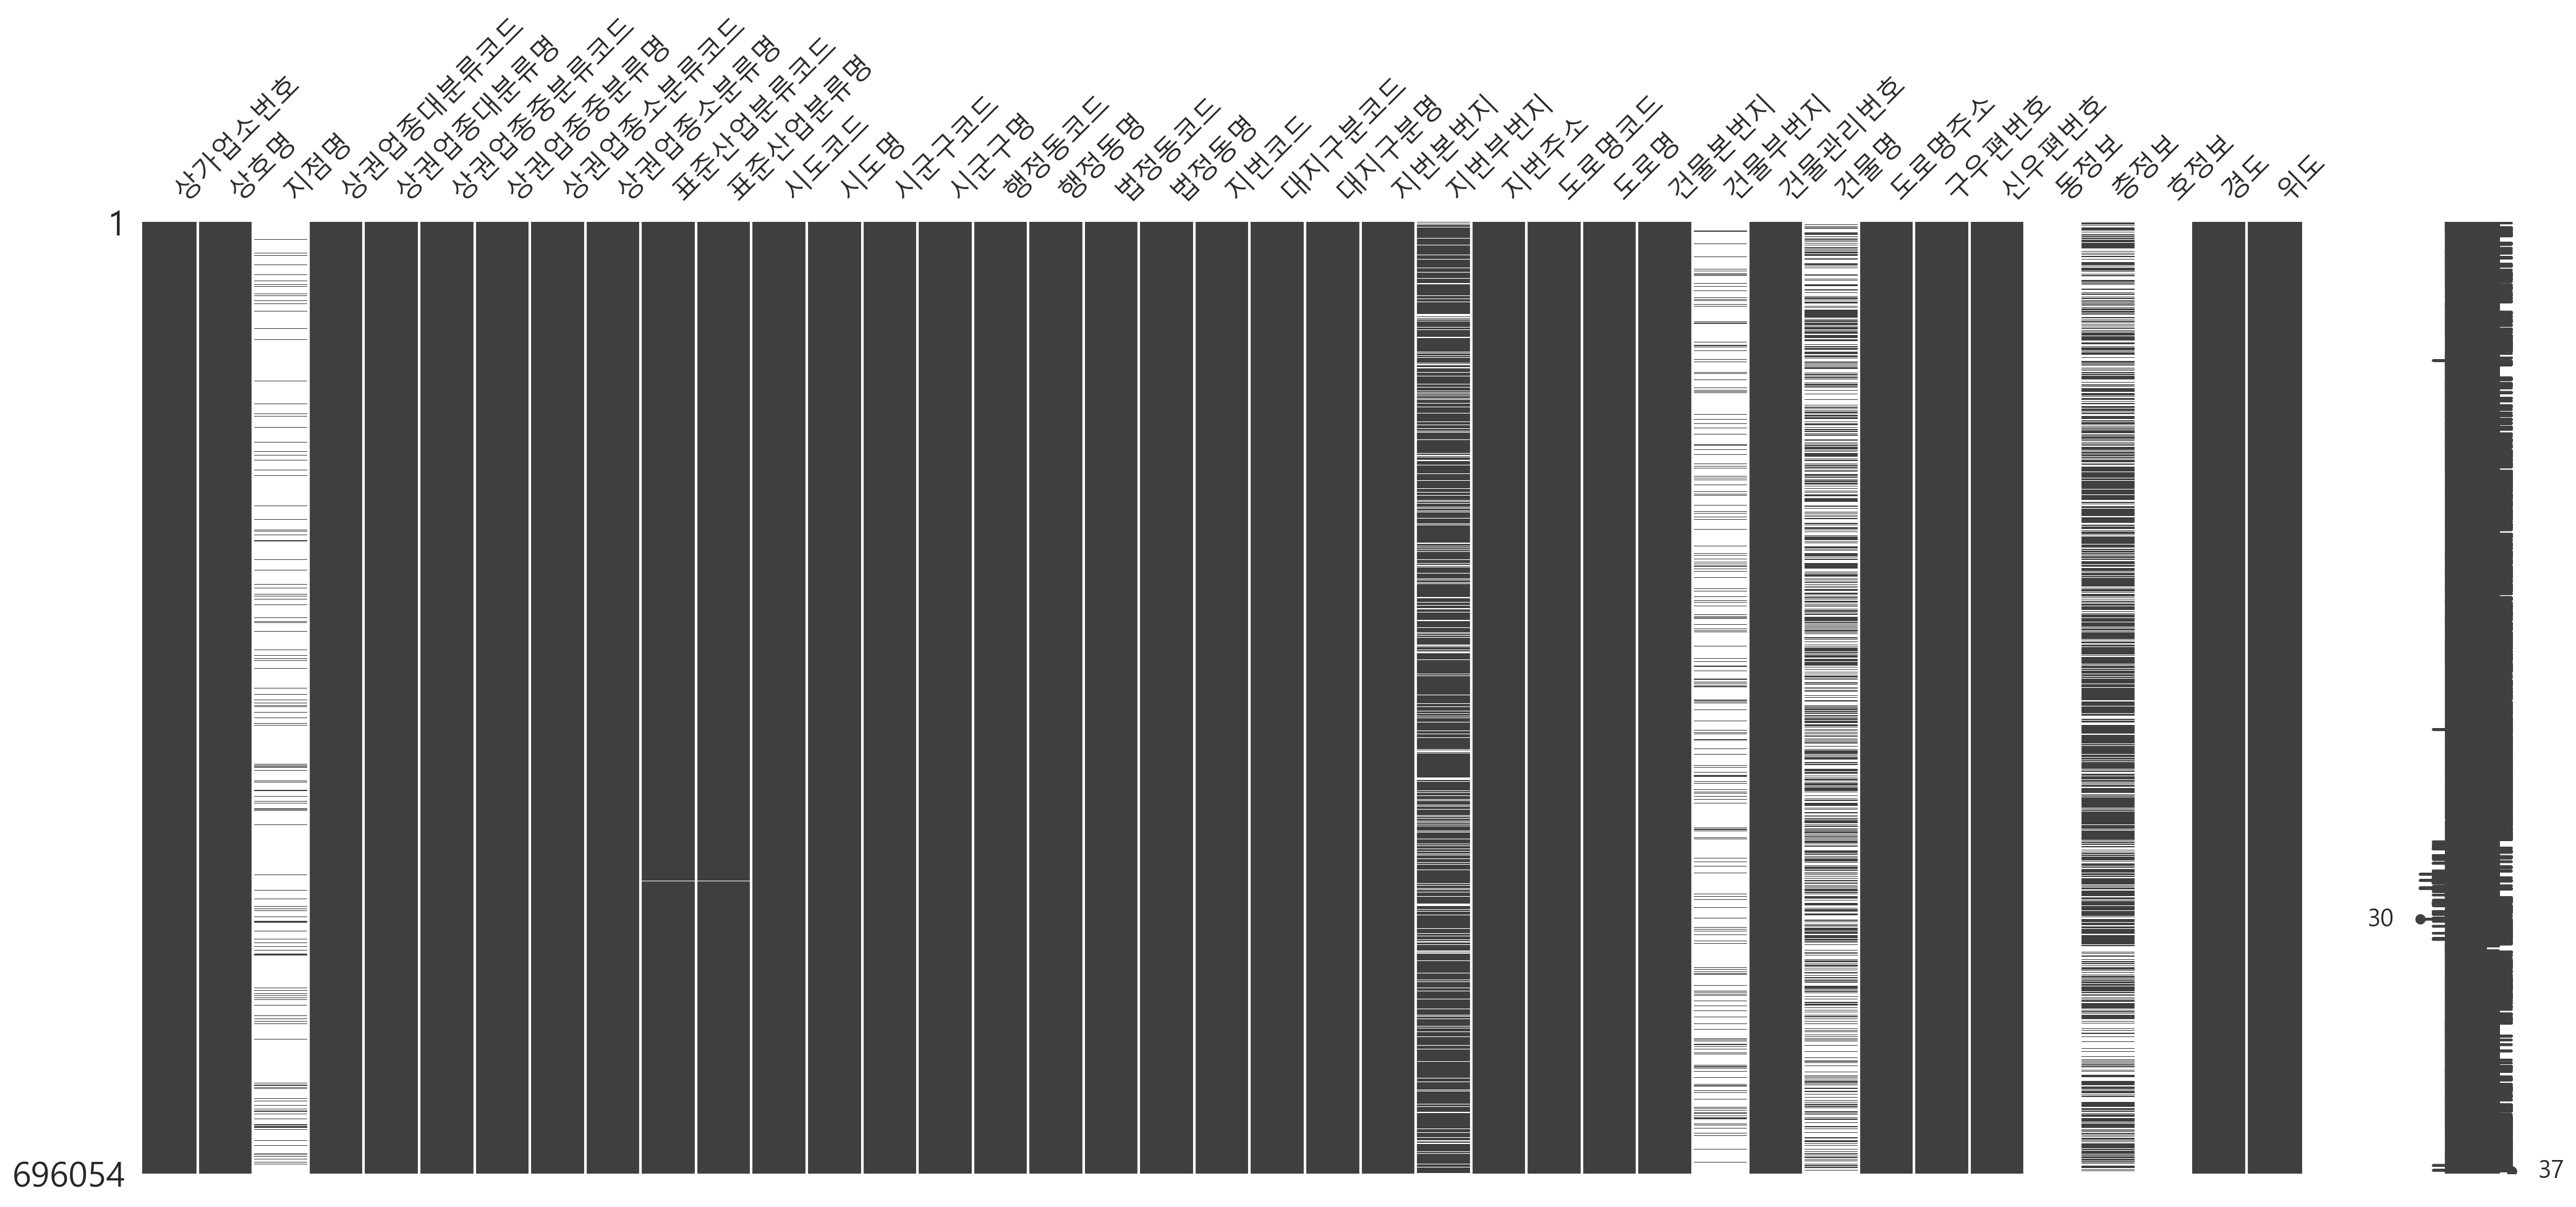

In [9]:
import missingno as msno
msno.matrix(df) # 데이터부분은 검정색, 결측치 부분은 하얀색
plt.show()

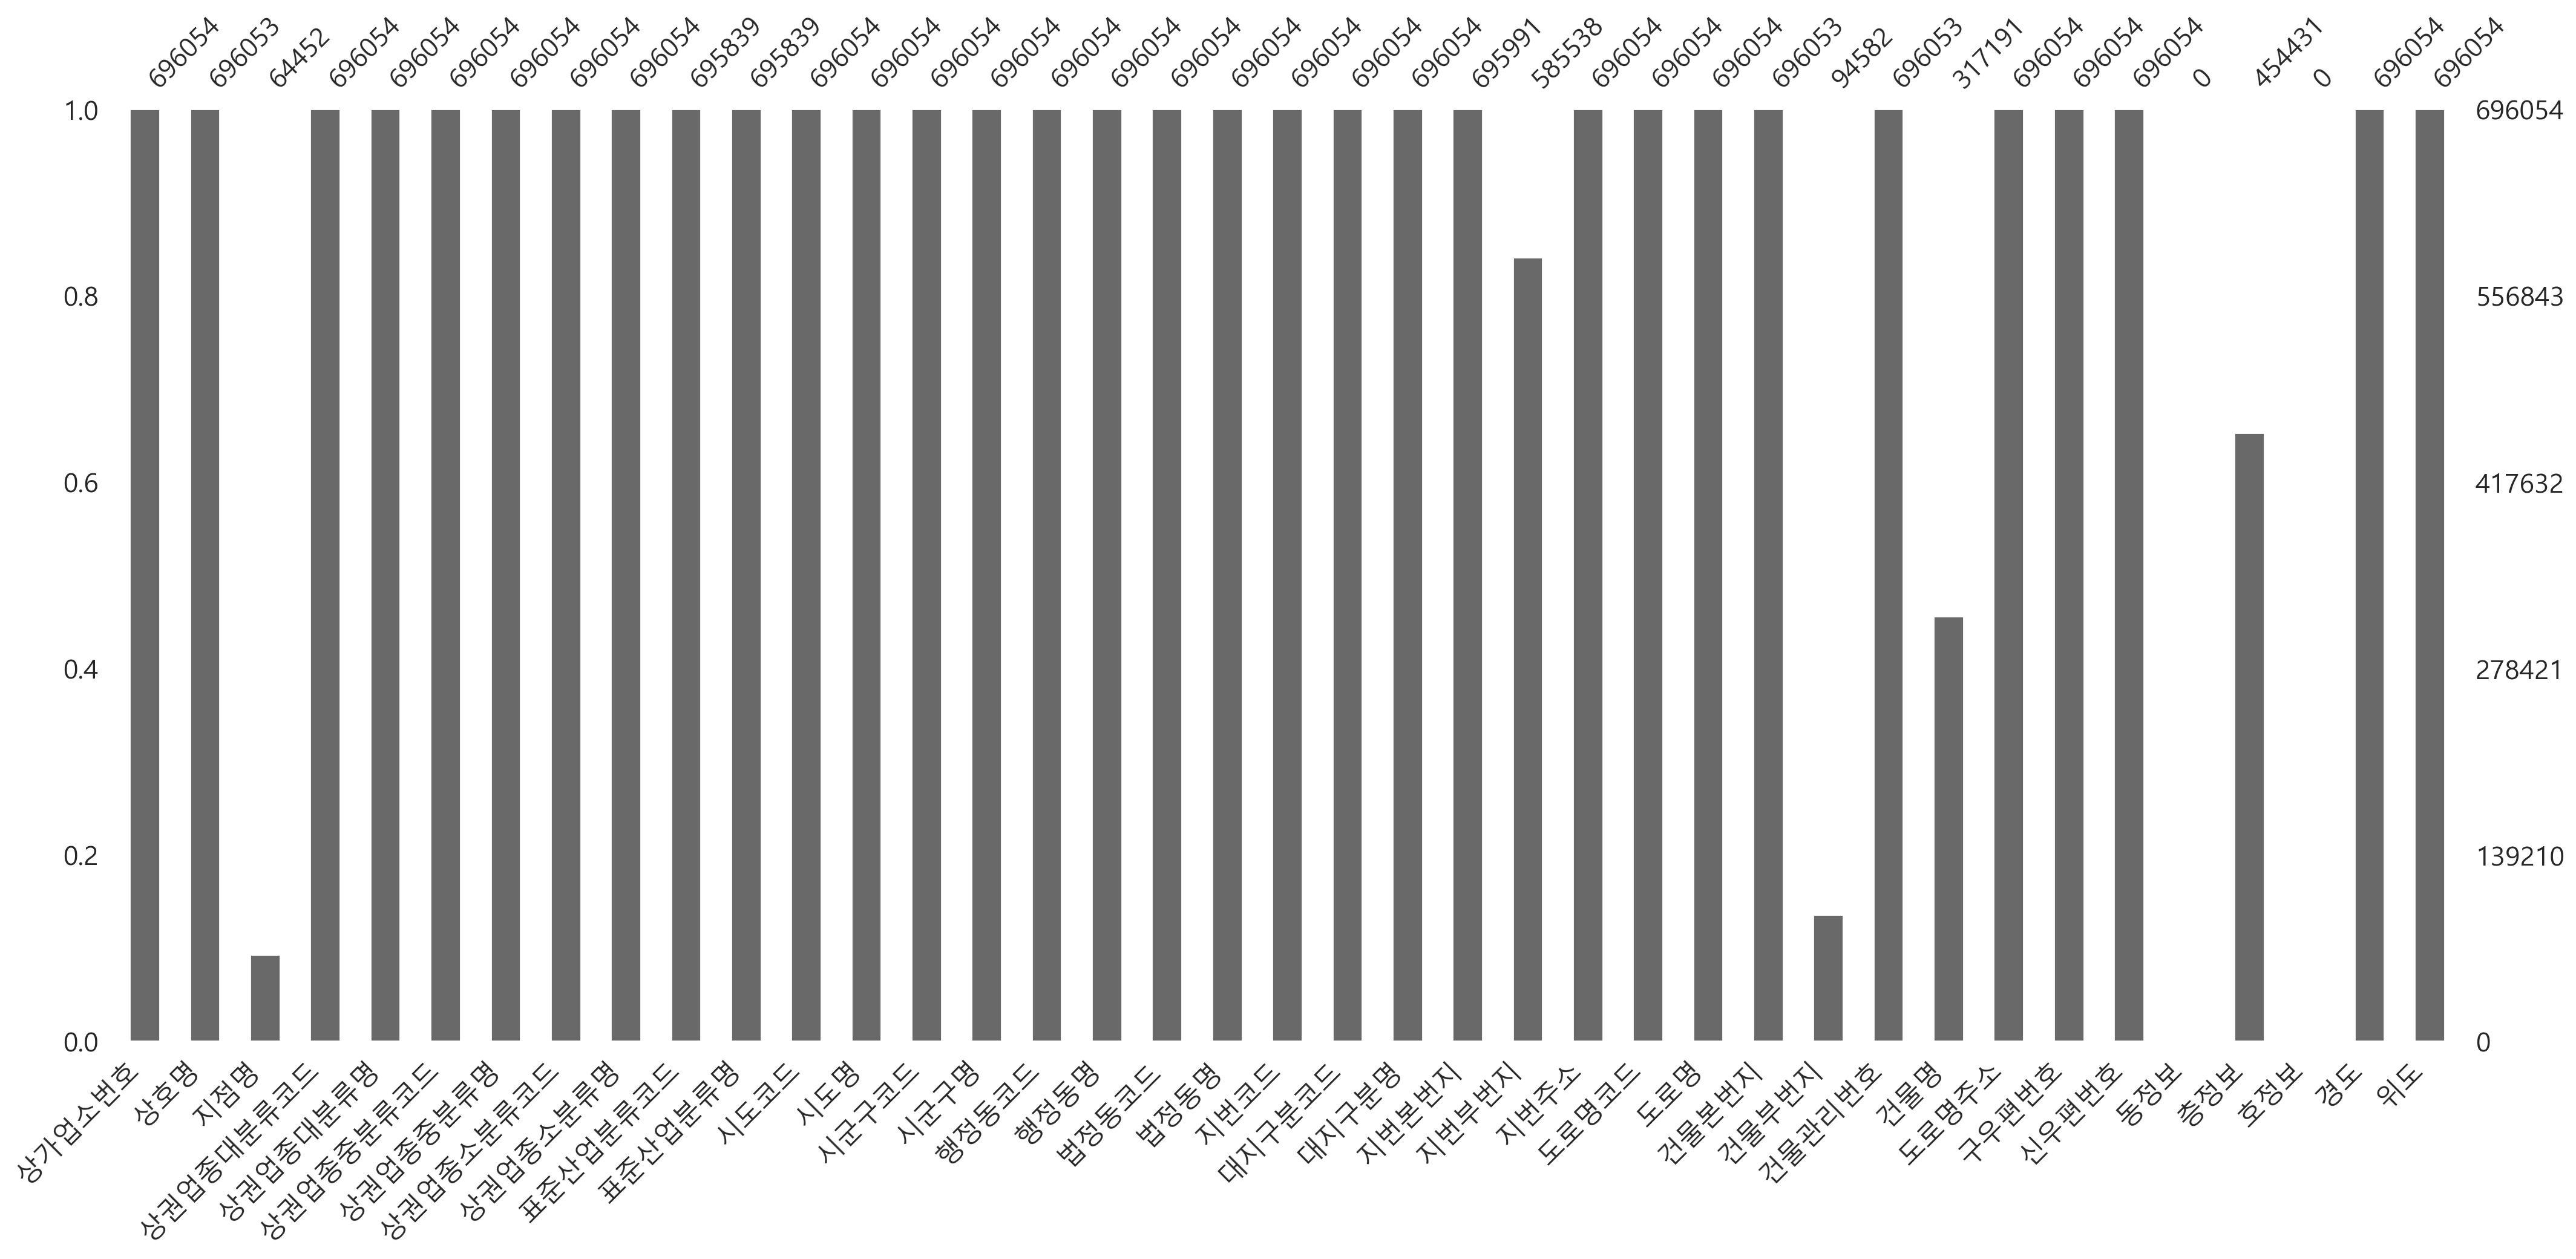

In [10]:
msno.bar(df)
plt.show()

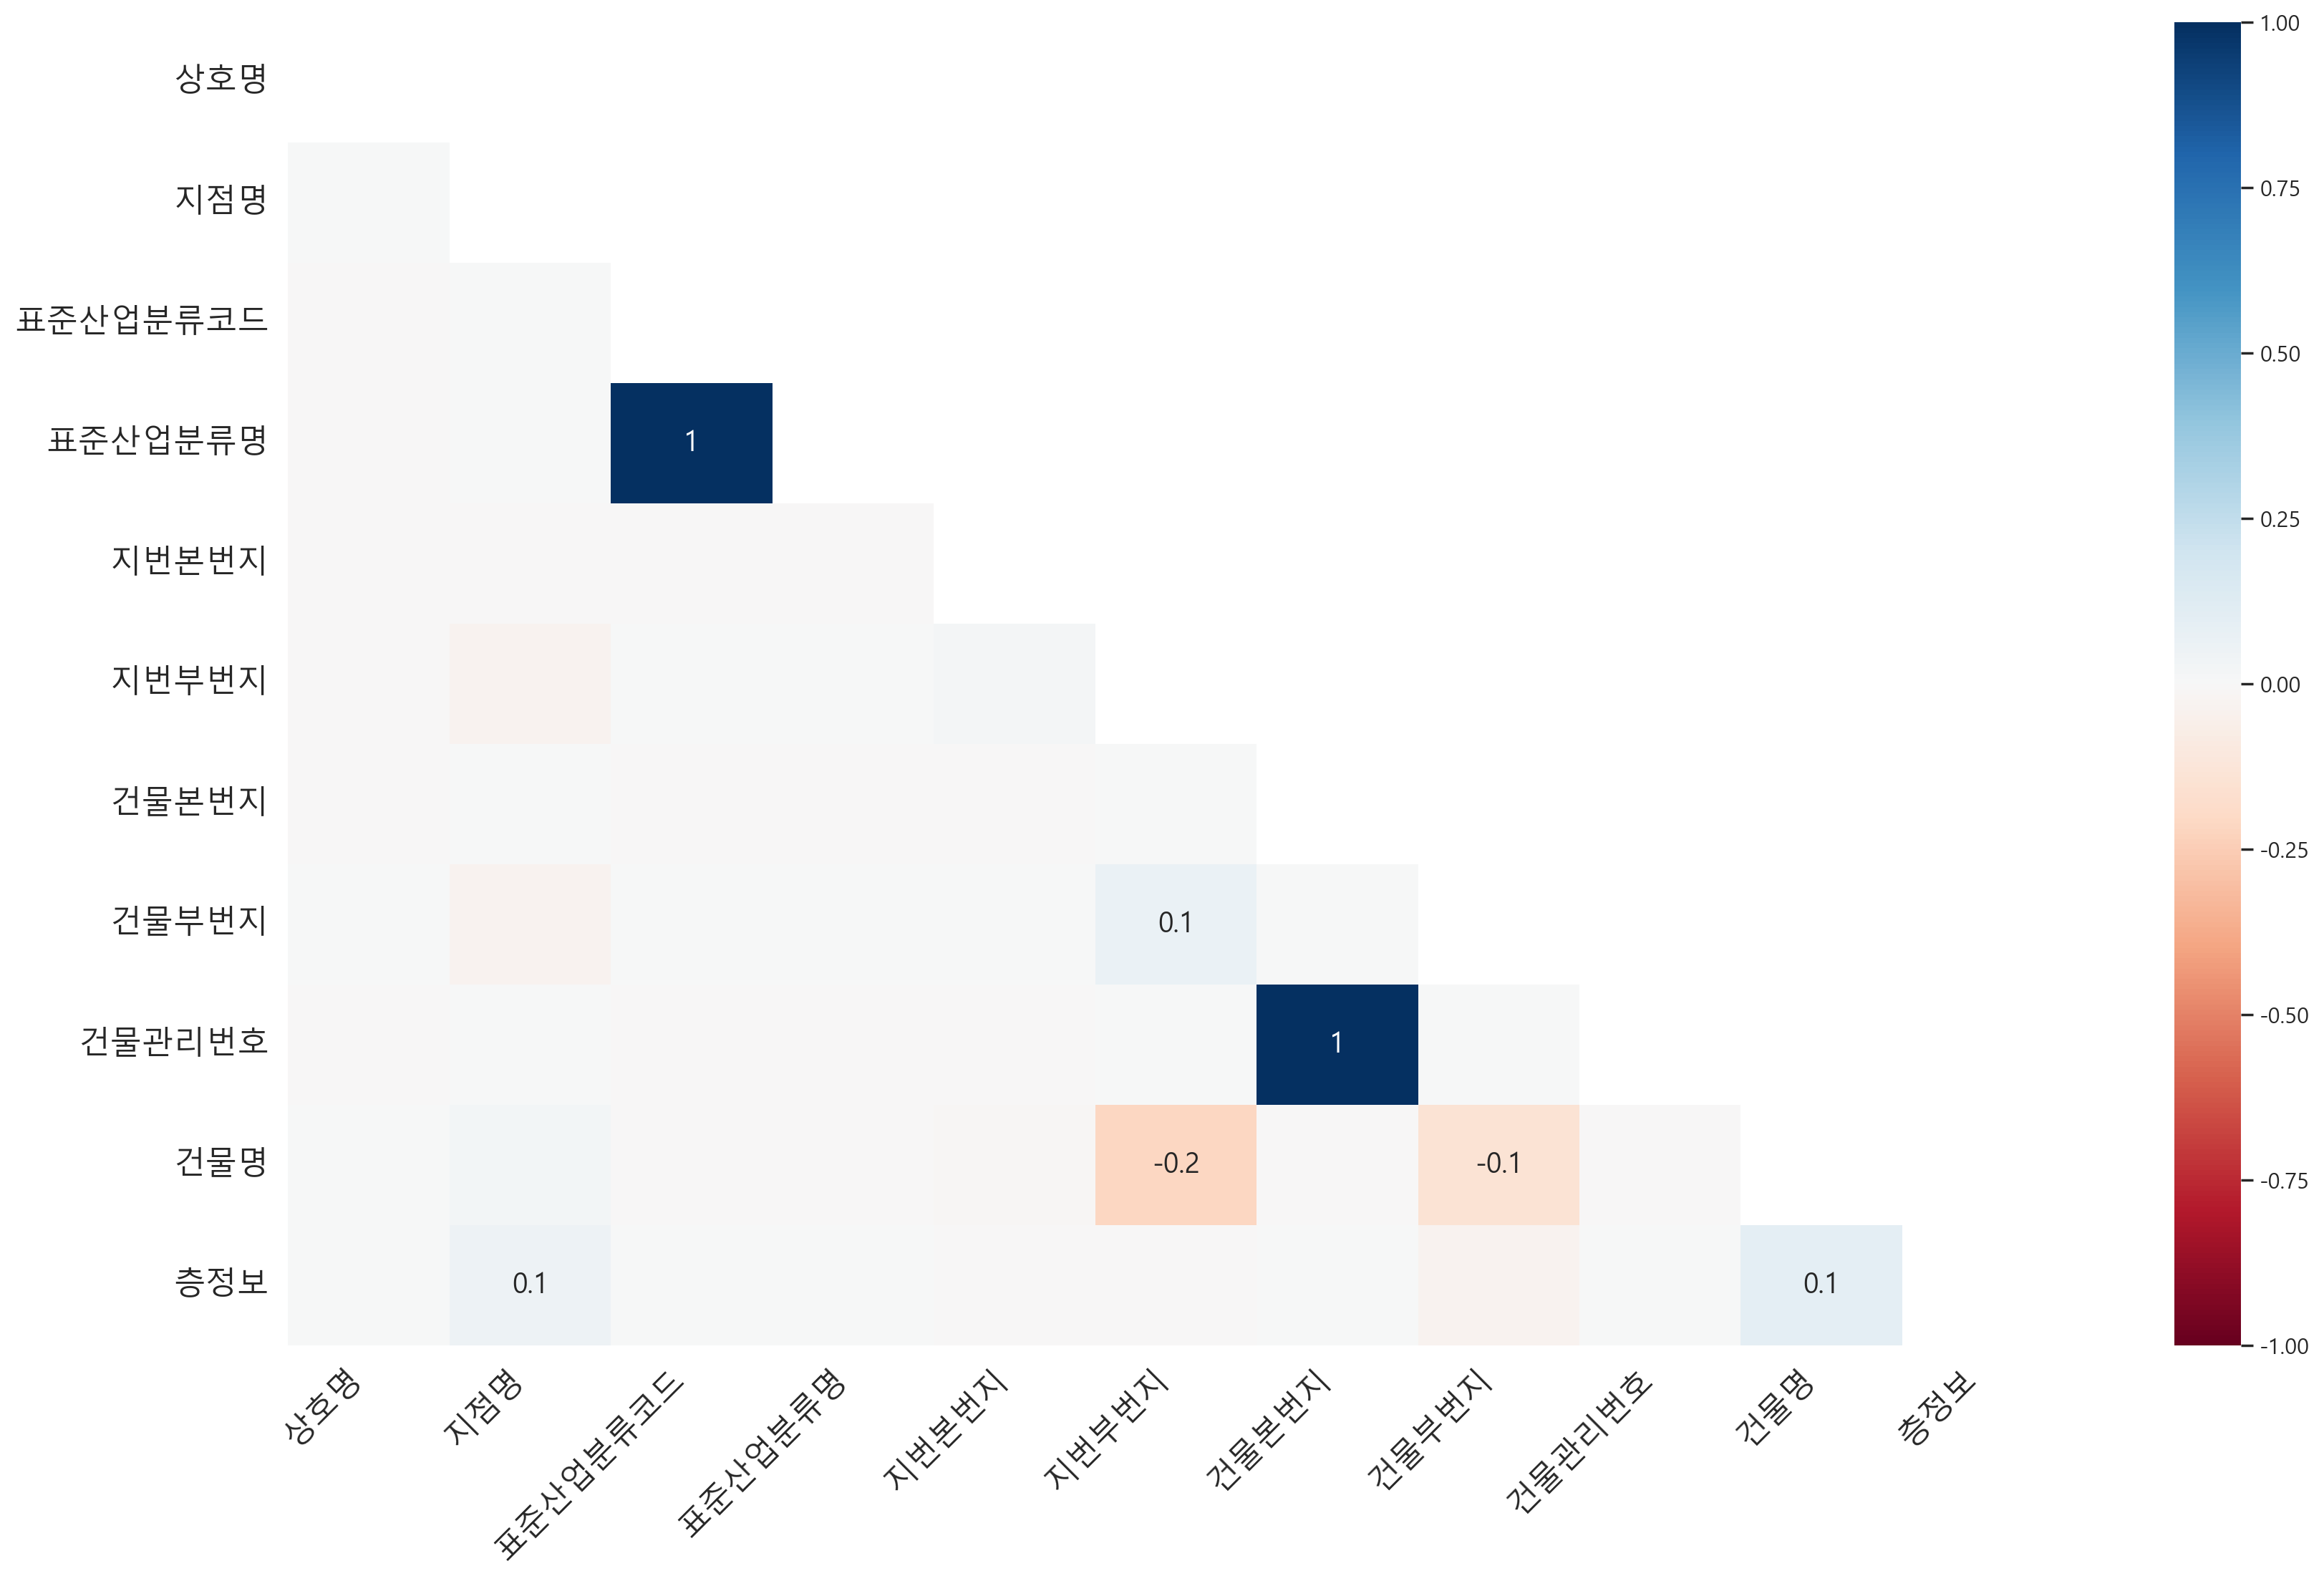

In [11]:
# 결측치가 있는 컬럼에 대해서 변수별 상관관계
msno.heatmap(df)
plt.show()

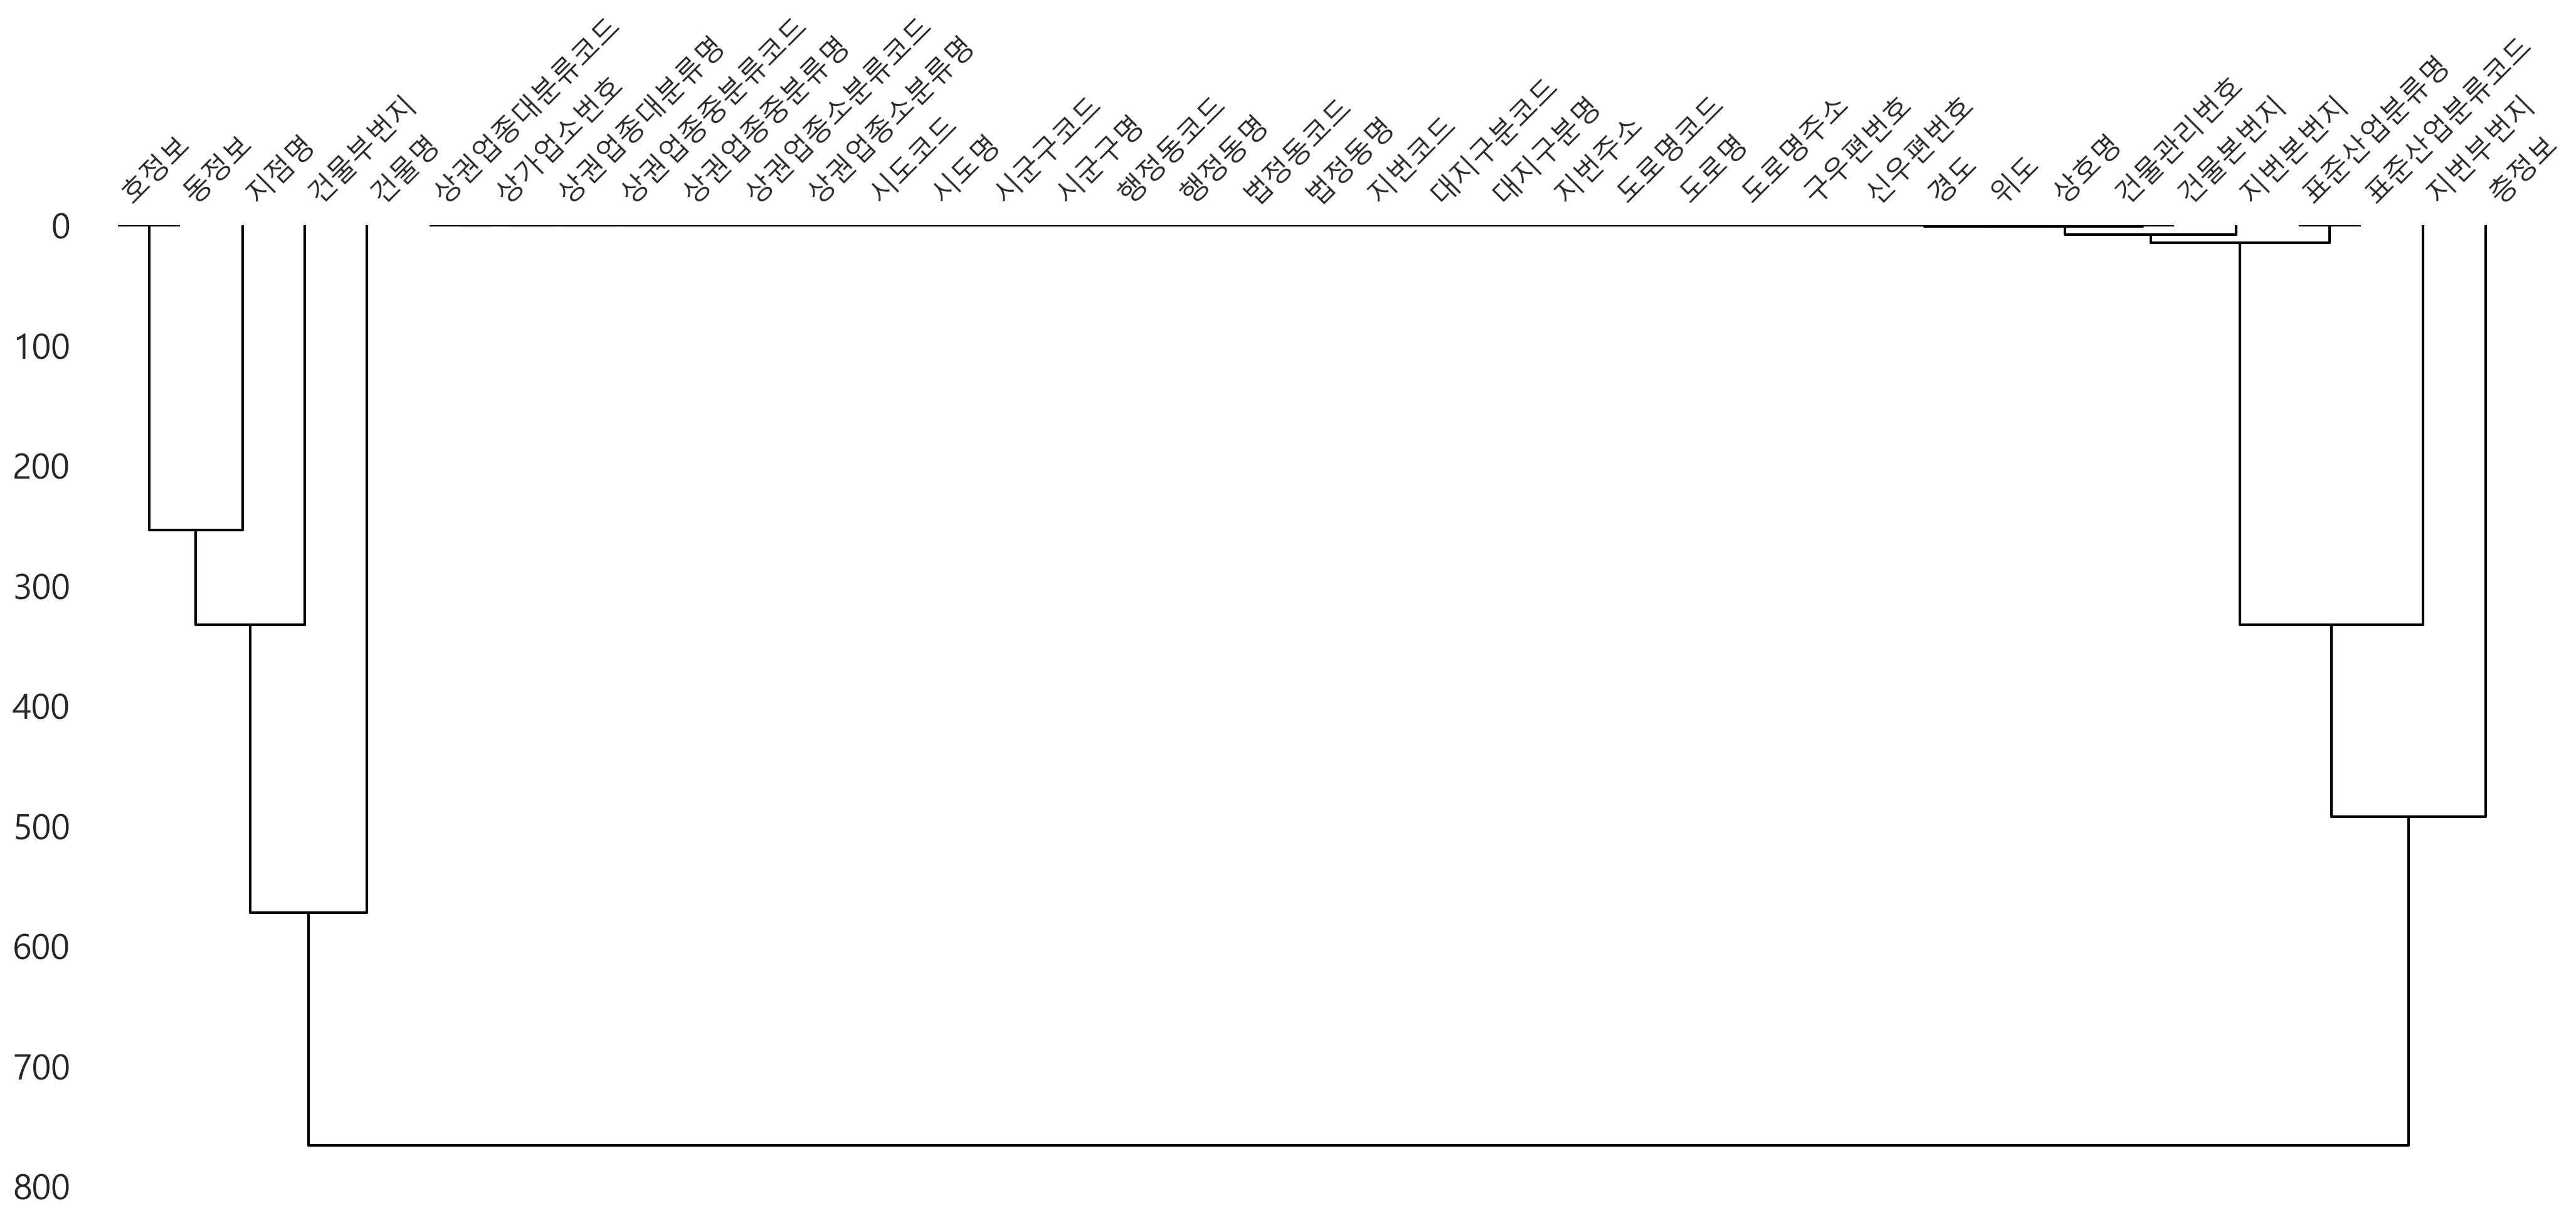

In [12]:
# 결측치가 있는 컬럼끼리 군집화
msno.dendrogram(df)
plt.show()

# 4.	df 데이터 셋에서 사용하지 않을 컬럼은 제거
## ①결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함.


In [20]:
# 결측치가 많은 사용하지 않을 컬럼
not_use = df.isnull().sum().sort_values(ascending=False).head(9)
not_use

호정보         696054
동정보         696054
지점명         631602
건물부번지       601472
건물명         378863
층정보         241623
지번부번지       110516
표준산업분류코드       215
표준산업분류명        215
dtype: int64

In [22]:
# 전체 데이터 갯수
df.shape[0], len(df)

(696054, 696054)

In [25]:
# 결측치 비율
round(not_use/df.shape[0] * 100, 3)

호정보         100.000
동정보         100.000
지점명          90.740
건물부번지        86.412
건물명          54.430
층정보          34.713
지번부번지        15.878
표준산업분류코드      0.031
표준산업분류명       0.031
dtype: float64

In [26]:
# 삭제할 컬럼명
not_use.index

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [29]:
print('컬럼 제거전 shape :', df.shape)
# 컬럼 삭제
df.drop(not_use.index, axis=1, inplace=True)
print('컬럼 제거후 shape :', df.shape)

컬럼 제거전 shape : (696054, 39)
컬럼 제거후 shape : (696054, 30)


In [30]:
df.info() # 159.3MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   상권업종대분류코드  696054 non-null  object 
 3   상권업종대분류명   696054 non-null  object 
 4   상권업종중분류코드  696054 non-null  object 
 5   상권업종중분류명   696054 non-null  object 
 6   상권업종소분류코드  696054 non-null  object 
 7   상권업종소분류명   696054 non-null  object 
 8   시도코드       696054 non-null  int64  
 9   시도명        696054 non-null  object 
 10  시군구코드      696054 non-null  int64  
 11  시군구명       696054 non-null  object 
 12  행정동코드      696054 non-null  int64  
 13  행정동명       696054 non-null  object 
 14  법정동코드      696054 non-null  int64  
 15  법정동명       696054 non-null  object 
 16  지번코드       696054 non-null  int64  
 17  대지구분코드     696054 non-null  int64  
 18  대지구분명      696054 non-null  object 
 19  지번본번지      695991 non-n

## ②	컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함

In [32]:
# 컬럼명
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

**※ 시리즈에 문자함수를 쓰기 위해 참조 :**
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [40]:
# cols에 '코드'나 '번호'
cols[(cols.str.find('코드')!=-1) | (cols.str.find('번호')!=-1)]

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [44]:
drop_cols = cols[cols.str.contains('코드|번호')]
drop_cols

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [47]:
print('제거전 shape :', df.shape)
# 제거
df.drop(drop_cols, axis=1, inplace=True)
print('제거후 shape :', df.shape)

제거전 shape : (696054, 30)
제거후 shape : (696054, 16)


In [48]:
# info()를 통해 메모리 사용량 확인
df.info() # 207.1MB -> 159.3MB -> 85MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       696053 non-null  object 
 1   상권업종대분류명  696054 non-null  object 
 2   상권업종중분류명  696054 non-null  object 
 3   상권업종소분류명  696054 non-null  object 
 4   시도명       696054 non-null  object 
 5   시군구명      696054 non-null  object 
 6   행정동명      696054 non-null  object 
 7   법정동명      696054 non-null  object 
 8   대지구분명     696054 non-null  object 
 9   지번본번지     695991 non-null  float64
 10  지번주소      696054 non-null  object 
 11  도로명       696054 non-null  object 
 12  건물본번지     696053 non-null  float64
 13  도로명주소     696054 non-null  object 
 14  경도        696054 non-null  float64
 15  위도        696054 non-null  float64
dtypes: float64(4), object(12)
memory usage: 85.0+ MB


# ※ df 파일io

In [50]:
df.to_csv('d:/ai/downloads/shareData/상가정보/서울부산상가정보백업.csv', index=False)

In [3]:
df = pd.read_csv('d:/ai/downloads/shareData/상가정보/서울부산상가정보백업.csv')

# 5. df 데이터 셋의 값을 가져온다(loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)
## ① 상호명 필드만 가져온다


In [60]:
df['상호명'] # 시리즈(추천)
df[['상호명']] # 데이터프레임 (추천)
df.loc[:, '상호명'] # 시리즈
df.loc[:, ['상호명']] # 데이터프레임
# 상호명은 0번째 컬럼
df.iloc[:, 0] # 시리즈
df.iloc[:, :1]# 데이터프레임

,상호명
0,부동산임대김은숙
1,한국황토건축연구소
2,소망공인중개사사무소
3,고향집
4,보석나라
...,...
696049,포마크파티룸
696050,정옥농장
696051,지안영어교습소
696052,히어로스포츠


## ②상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [65]:
# 상호명 종류들
df['상호명'].unique()

array(['부동산임대김은숙', '한국황토건축연구소', '소망공인중개사사무소', ..., '포마크파티룸', '정옥농장',
       '지안영어교습소'], dtype=object)

In [67]:
df.isna().sum() # 결측치가 없는 열 확인(groupby 사용)

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지       63
지번주소         0
도로명          0
건물본번지        1
도로명주소        0
경도           0
위도           0
dtype: int64

In [69]:
df.groupby('상호명')['위도'].count().sort_values(ascending=False)

상호명
컴퓨터수리                  576
입시·교과학원                351
입주청소                   308
김밥천국                   232
현대공인중개사사무소             195
                      ... 
본푸드서비스삼표점주               1
본푸드서비스본우리집밥이마트수서점        1
본푸드서비스본우리집밥본그룹본사점        1
본푸드서비스본우리집밥대치위담한방병원      1
［주］세일캠퍼스                 1
Name: 위도, Length: 535747, dtype: int64

In [71]:
df['상호명'].value_counts() # 자동정렬

컴퓨터수리         576
입시·교과학원       351
입주청소          308
김밥천국          232
현대공인중개사사무소    195
             ... 
오오토리            1
이천산업            1
미가뷰티            1
가산문고            1
지안영어교습소         1
Name: 상호명, Length: 535747, dtype: int64

## ③	“상호명”과 "도로명주소”, "상권업종소분류명" 컬럼 가져오기

In [73]:
df[['상호명','도로명주소','상권업종소분류명']]

,상호명,도로명주소,상권업종소분류명
0,부동산임대김은숙,서울특별시 종로구 삼청로 122-1,카페
1,한국황토건축연구소,서울특별시 서초구 서초대로73길 40,부동산 중개/대리업
2,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18,부동산 중개/대리업
3,고향집,서울특별시 종로구 돈화문로4길 30,백반/한정식
4,보석나라,서울특별시 구로구 개봉로3길 23,시계/귀금속 소매업
...,...,...,...
696049,포마크파티룸,부산광역시 부산진구 중앙대로 763-1,애완동물/애완용품 소매업
696050,정옥농장,부산광역시 기장군 장안읍 오리길 69-12,슈퍼마켓
696051,지안영어교습소,부산광역시 해운대구 세실로 31,입시·교과학원
696052,히어로스포츠,부산광역시 사상구 가야대로366번길 22,요가/필라테스 학원


## ④ 0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)

In [77]:
df.loc[:2]
df.iloc[:3]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


# 6. 기술 통계값 보기 

- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)
- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)
* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수

### **개별 기술 통계값 구하기**

* [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
* count : 결측치를 제외한 값 갯수
* min, max: 최솟값, 최댓값
* argmin, argmax : 최솟값 인덱스, 최댓값 인덱스 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)
* cov, corr() : 공분산, 상관계수
* skew 왜도 (오른쪽으로 치우침= 왜도<0, 왼쪽으로 치우침=왜도>0)
* kurt 첨도


## ①	df 데이터셋의 요약기술 통계량

In [78]:
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
df.describe() # 수치형에 대한 요약 기술통계량

,지번본번지,건물본번지,경도,위도
count,695991.000000,696053.000000,696054.000000,696054.000000
mean,480.607357,143.589911,127.455853,37.009921
std,512.914069,263.204012,0.866655,0.990450
min,1.000000,1.000000,126.768186,34.989747
25%,111.000000,19.000000,126.943200,37.474714
50%,335.000000,47.000000,127.034361,37.514521
75%,684.000000,152.000000,127.130725,37.560269
max,6435.000000,3646.000000,129.292220,37.692604


In [79]:
df.describe(include='object') # object형에 대한 요약기술통계량

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,696053,696054,696054,696054,696054,696054,696054,696054,696054,696054,696054,696054
unique,535747,10,75,247,2,39,628,647,2,220969,18864,223665
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,서울특별시 송파구 충민로 66
freq,576,193508,71670,34283,540517,64716,13655,18140,695225,938,4462,1200


In [80]:
df.describe(include='all') # 모든 타입에 대해 요약 기술통계량

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
count,696053,696054,696054,696054,696054,696054,696054,696054,696054,695991.000000,696054,696054,696053.000000,696054,696054.000000,696054.000000
unique,535747,10,75,247,2,39,628,647,2,NaN,220969,18864,NaN,223665,NaN,NaN
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,NaN,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,NaN,서울특별시 송파구 충민로 66,NaN,NaN
freq,576,193508,71670,34283,540517,64716,13655,18140,695225,NaN,938,4462,NaN,1200,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.607357,NaN,NaN,143.589911,NaN,127.455853,37.009921
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.914069,NaN,NaN,263.204012,NaN,0.866655,0.990450
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,126.768186,34.989747
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,NaN,19.000000,NaN,126.943200,37.474714
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.000000,NaN,NaN,47.000000,NaN,127.034361,37.514521
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684.000000,NaN,NaN,152.000000,NaN,127.130725,37.560269


In [82]:
df.describe(exclude=['object','int']) # object, int형은 제외한 요약 기술통계량

,지번본번지,건물본번지,경도,위도
count,695991.000000,696053.000000,696054.000000,696054.000000
mean,480.607357,143.589911,127.455853,37.009921
std,512.914069,263.204012,0.866655,0.990450
min,1.000000,1.000000,126.768186,34.989747
25%,111.000000,19.000000,126.943200,37.474714
50%,335.000000,47.000000,127.034361,37.514521
75%,684.000000,152.000000,127.130725,37.560269
max,6435.000000,3646.000000,129.292220,37.692604


## ②	df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다.

In [83]:
df[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지번본번지   695991 non-null  float64
 1   건물본번지   696053 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [84]:
df[['지번본번지','건물본번지']].head()

,지번본번지,건물본번지
0,28.0,122.0
1,1308.0,40.0
2,4.0,18.0
3,80.0,30.0
4,359.0,23.0


In [86]:
# float64 타입인 데이터(서브셋)만 추출
df.select_dtypes('float64')
# float64 타입을 제외한 데이터(서브셋)만 추출
df.select_dtypes(exclude='float64')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18
3,고향집,음식,한식,백반/한정식,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30
4,보석나라,소매,시계·귀금속 소매,시계/귀금속 소매업,서울특별시,구로구,개봉3동,개봉동,대지,서울특별시 구로구 개봉동 359-8,서울특별시 구로구 개봉로3길,서울특별시 구로구 개봉로3길 23
...,...,...,...,...,...,...,...,...,...,...,...,...
696049,포마크파티룸,소매,애완동물·용품 소매,애완동물/애완용품 소매업,부산광역시,부산진구,부전1동,부전동,대지,부산광역시 부산진구 부전동 267-3,부산광역시 부산진구 중앙대로,부산광역시 부산진구 중앙대로 763-1
696050,정옥농장,소매,종합 소매,슈퍼마켓,부산광역시,기장군,장안읍,장안읍,대지,부산광역시 기장군 장안읍 오리 285-2,부산광역시 기장군 장안읍 오리길,부산광역시 기장군 장안읍 오리길 69-12
696051,지안영어교습소,교육,일반 교육,입시·교과학원,부산광역시,해운대구,좌2동,좌동,대지,부산광역시 해운대구 좌동 1485-4,부산광역시 해운대구 세실로,부산광역시 해운대구 세실로 31
696052,히어로스포츠,교육,기타 교육,요가/필라테스 학원,부산광역시,사상구,주례2동,주례동,대지,부산광역시 사상구 주례동 74-25,부산광역시 사상구 가야대로366번길,부산광역시 사상구 가야대로366번길 22


## ③	“위도", "경도” 컬럼만의 요약 기술통계량

In [87]:
df[['위도','경도']].describe()

,위도,경도
count,696054.000000,696054.000000
mean,37.009921,127.455853
std,0.990450,0.866655
min,34.989747,126.768186
25%,37.474714,126.943200
50%,37.514521,127.034361
75%,37.560269,127.130725
max,37.692604,129.292220


# 7.단별량 수치형 변수 시각화
## ① 위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

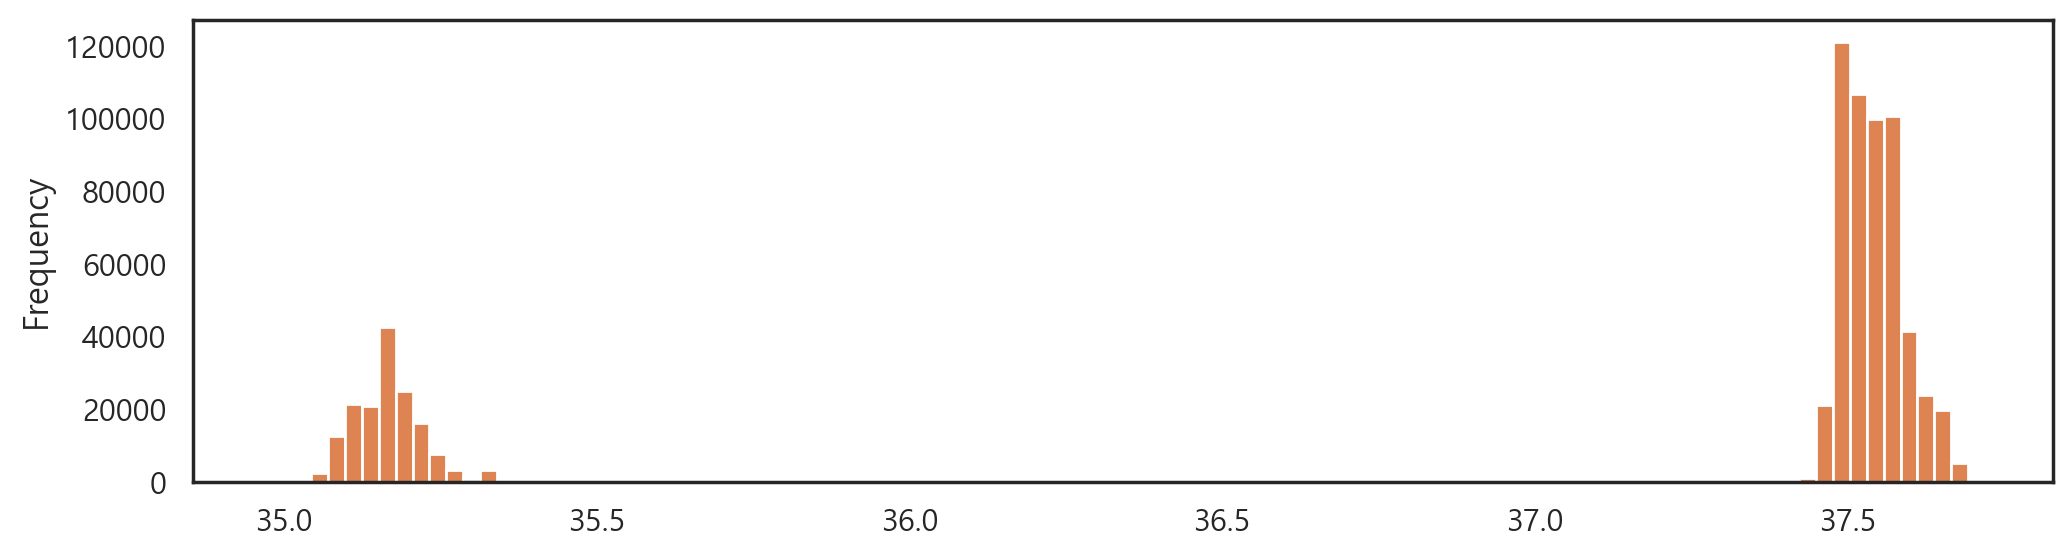

In [94]:
df['위도'].plot.hist(bins=100)
df['위도'].plot(kind='hist', bins=100)
plt.show()

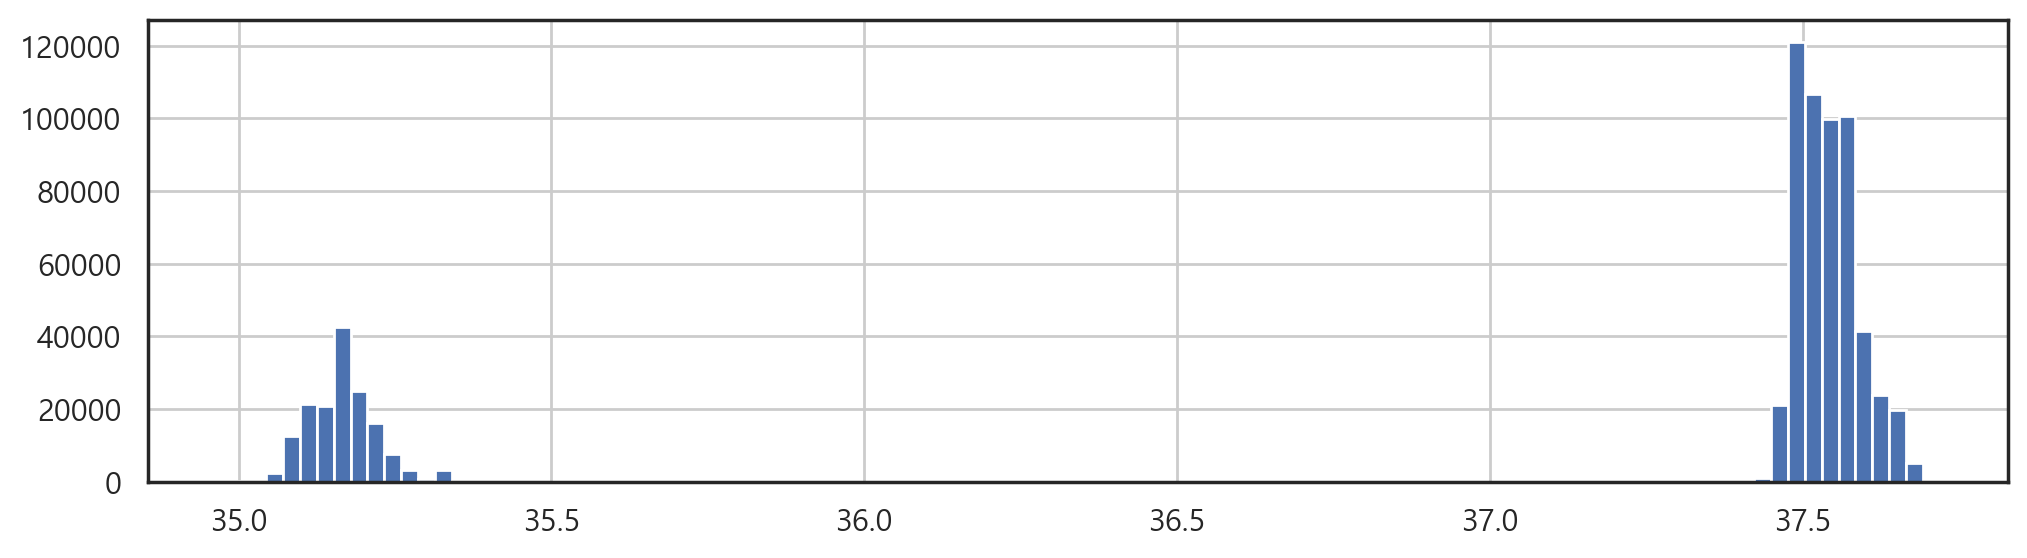

In [96]:
df['위도'].hist(bins=100)
plt.show()

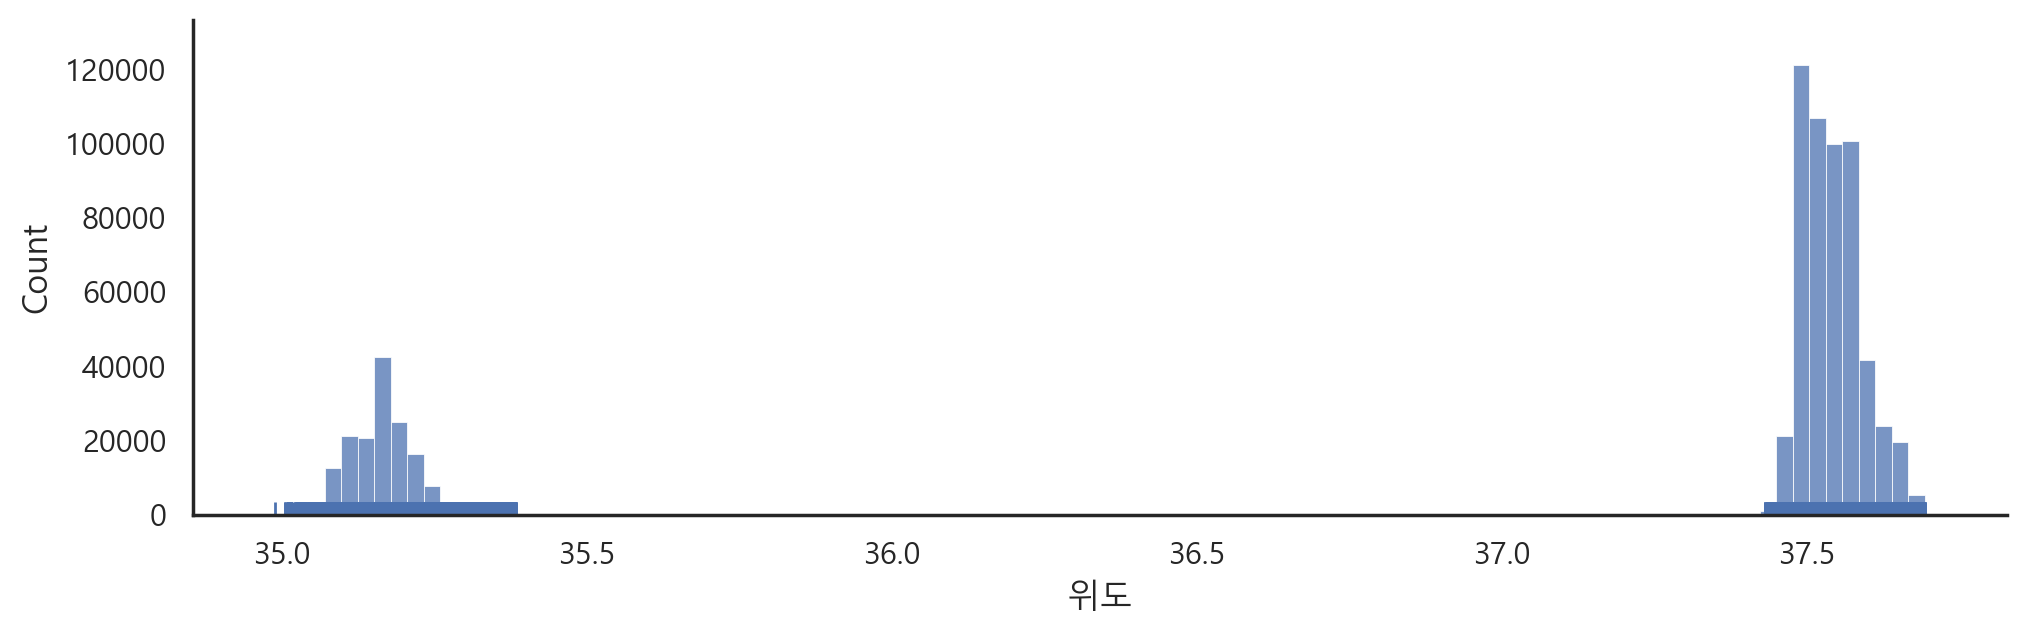

In [99]:
g = sns.displot(df['위도'], bins=100, rug=True)
g.fig.set_size_inches(12,3)

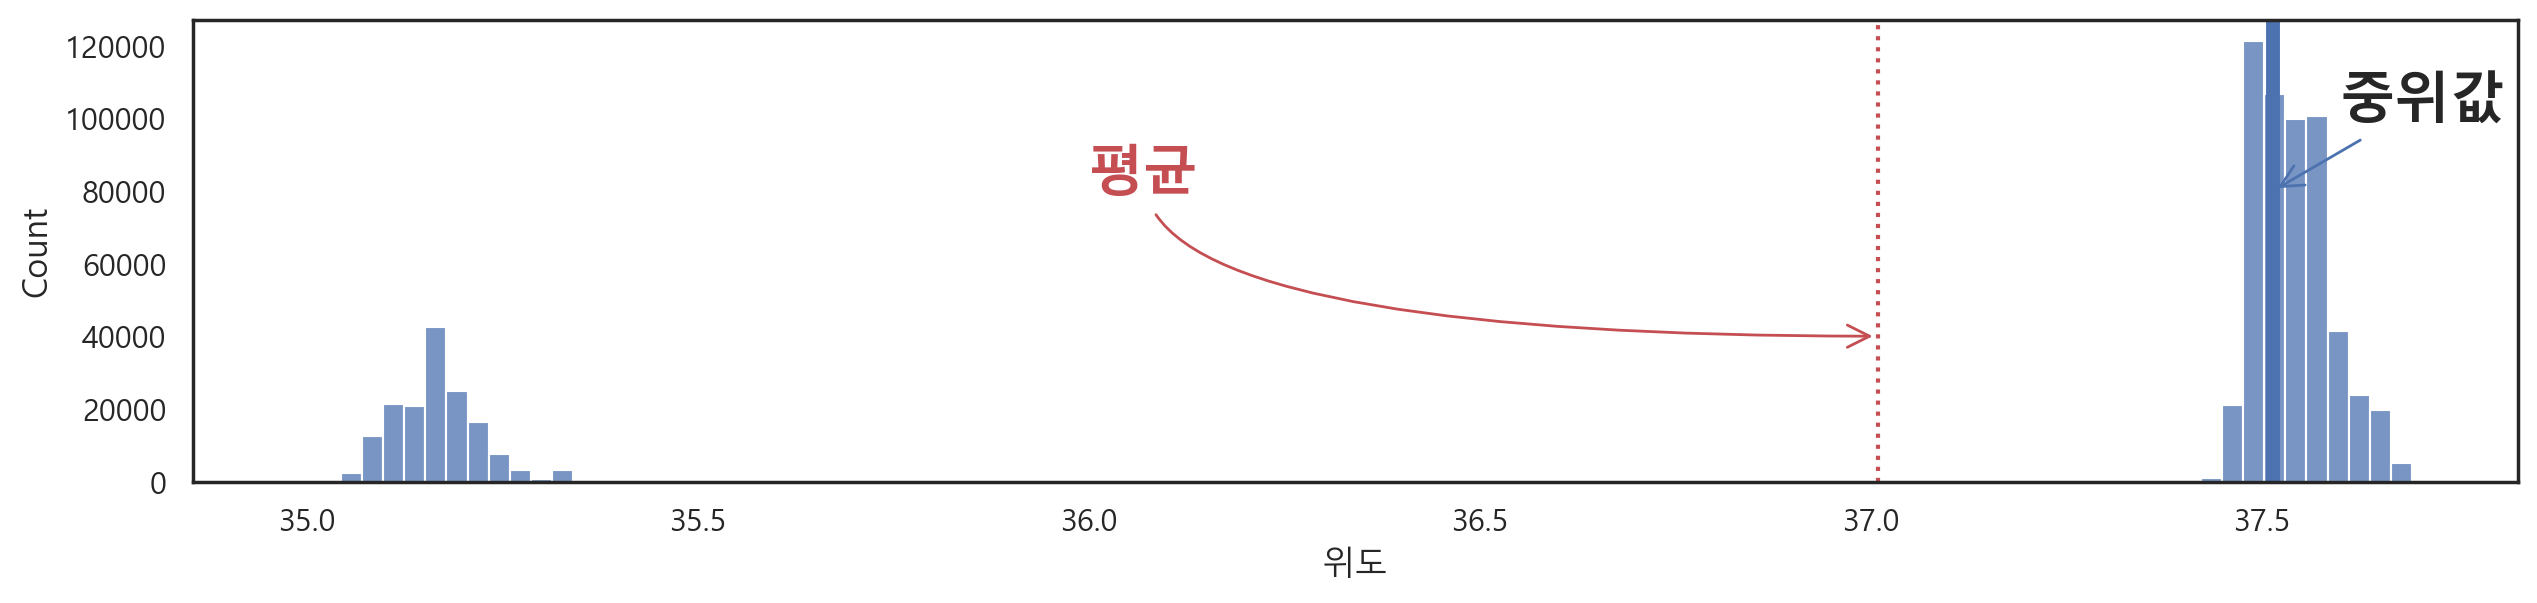

In [116]:
plt.figure(figsize=(15,3))
sns.histplot(df['위도'], bins=100)
# plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085
plt.axvline(df['위도'].mean(), color='r', linestyle=':')
plt.annotate('평균',
            xy = (df['위도'].mean(), 40000), # 화살표가 가르킬 위치 좌표
            xytext = (36, 80000), # 글자 위치 좌표
            arrowprops = {'arrowstyle':'->',
                         'connectionstyle':'angle3', # angle, arc
                         'color':'r'} ,
             fontsize=20,
             color='r',
             weight='bold'
            )
plt.axvline(df['위도'].median(), color='b', linewidth=5)
plt.annotate('중위값',
            xytext=(37.6, 100000),
            xy=(df['위도'].median(), 80000),
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc',
                           color='b'),
            fontsize=20,
            weight='bold')
plt.show()

In [117]:
# 데이터의 치운친 정도 : 왜도(skew)
# 음수:오른쪽으로 치우침 / 양수:왼쪽으로 치우침
df['위도'].skew()

-1.3235077358631402

In [118]:
# 첨도 : 첨예한 정도
df['위도'].kurt()

-0.23409681334942478

## ② 경도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

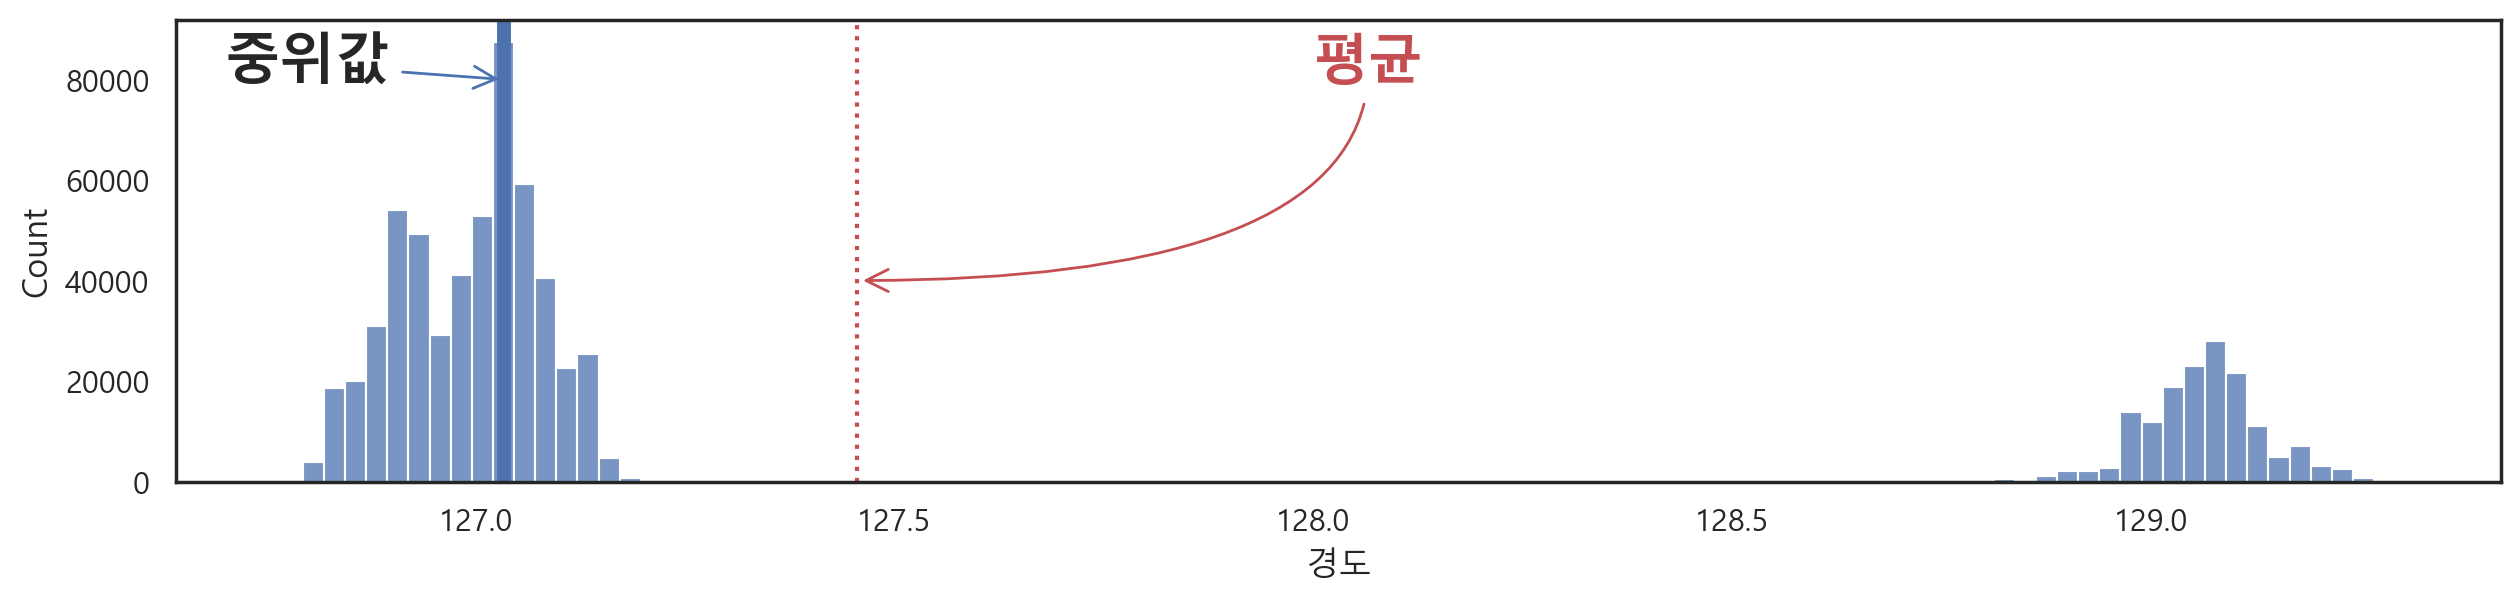

In [127]:
plt.figure(figsize=(15,3))
sns.histplot(df['경도'], bins=100)
# plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085
plt.axvline(df['경도'].mean(), color='r', linestyle=':')
plt.annotate('평균',
            xy = (df['경도'].mean(), 40000), # 화살표가 가르킬 위치 좌표
            xytext = (128, 80000), # 글자 위치 좌표
            arrowprops = {'arrowstyle':'->',
                         'connectionstyle':'angle3', # angle, arc
                         'color':'r'} ,
             fontsize=20,
             color='r',
             weight='bold'
            )
plt.axvline(df['경도'].median(), color='b', linewidth=5)
plt.annotate('중위값',
            xytext=(126.7, 80000),
            xy=(df['경도'].median(), 80000),
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc',
                           color='b'),
            fontsize=20,
            weight='bold')
plt.show()

# 8. 상관계수
-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)


## ① 전체 숫자 컬럼끼리의 상관계수

In [129]:
corr = df.corr(numeric_only=True)
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057312,0.169355,-0.189570
건물본번지,0.057312,1.000000,-0.005815,0.012164
경도,0.169355,-0.005815,1.000000,-0.993565
위도,-0.189570,0.012164,-0.993565,1.000000


## ②	상관계수를 이용하여 heatmap 시각화
- 참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

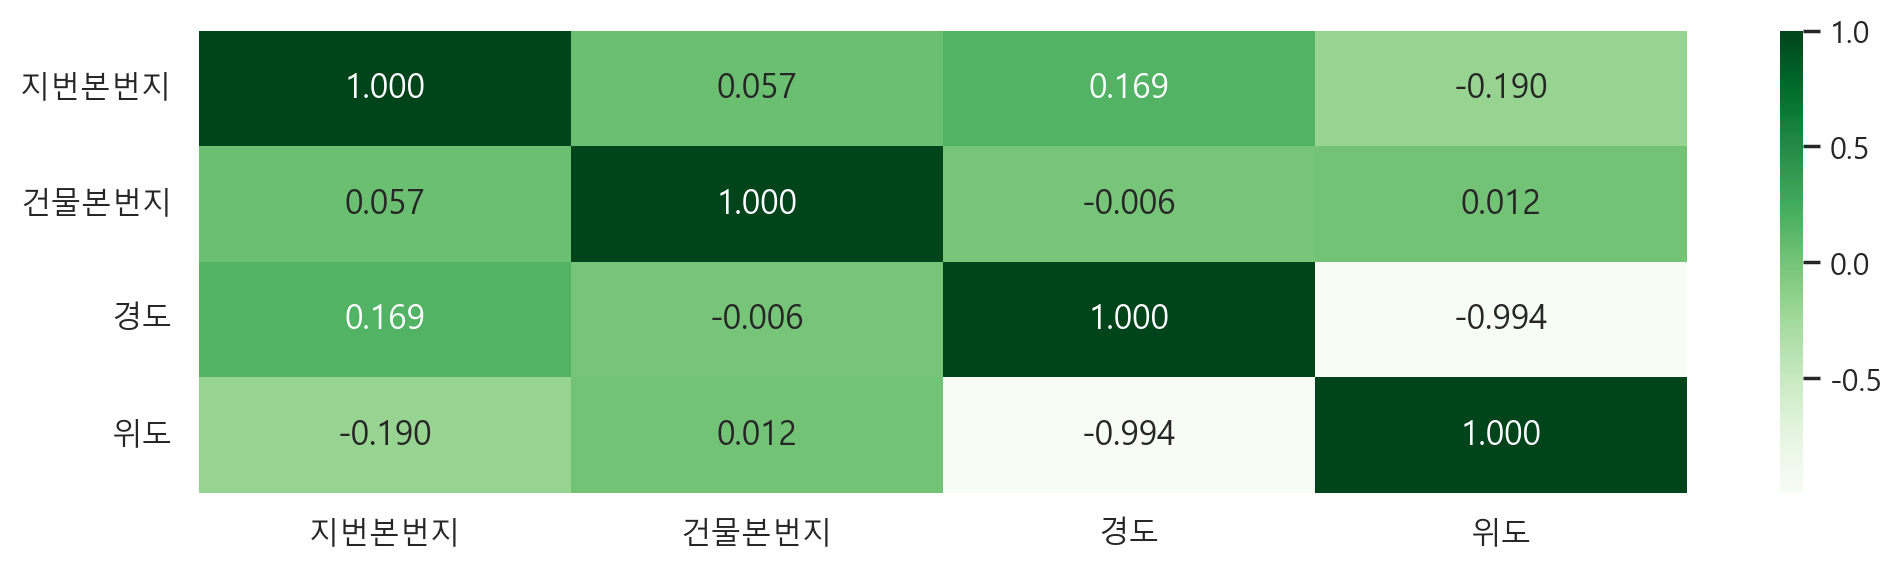

In [131]:
sns.heatmap(corr, annot=True, fmt='.3f', cmap='Greens')
plt.show()

In [136]:
np.ones_like(corr, dtype=bool) # corr과 구조가 같은 1로 채워진 배열

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [144]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

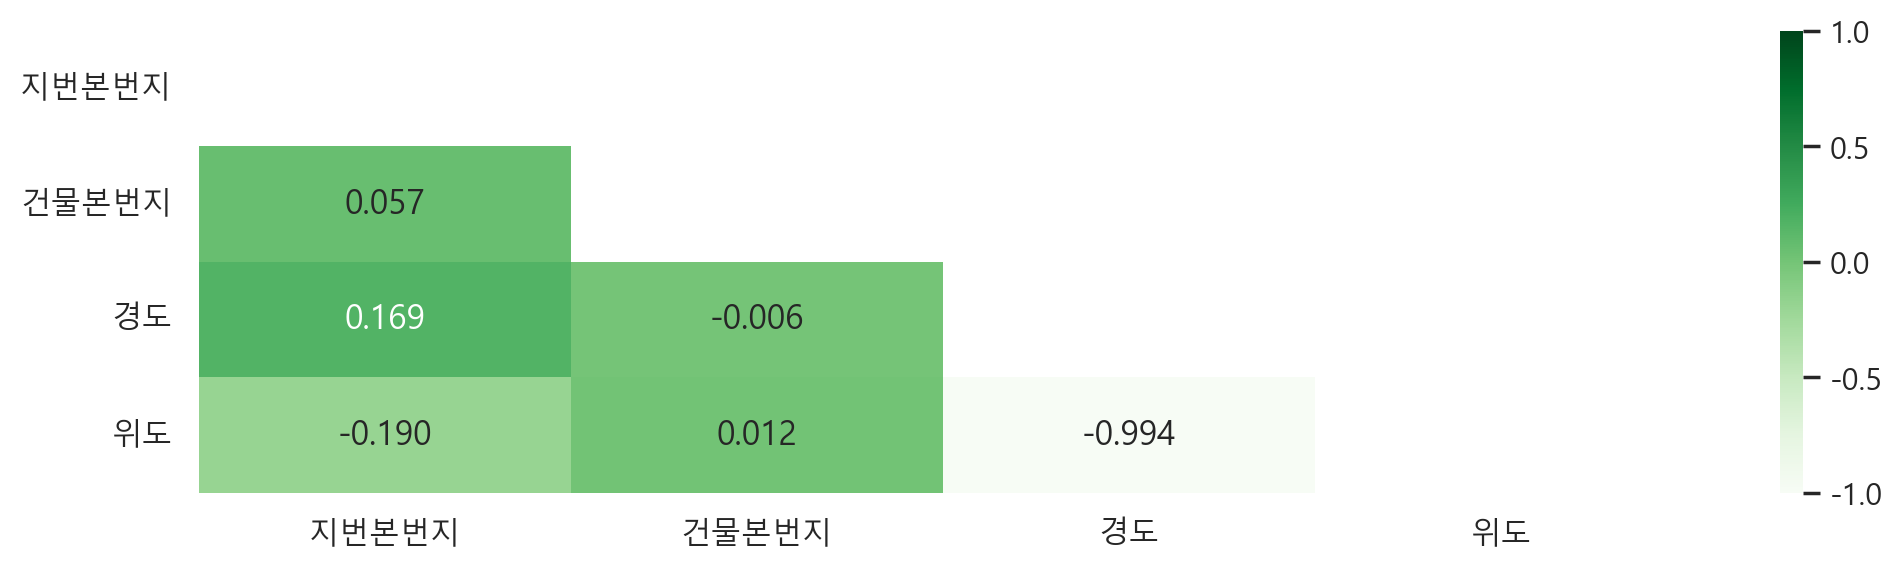

In [147]:
sns.heatmap(corr, annot=True, fmt='.3f', cmap='Greens', vmin=-1, vmax=1, mask=mask)
plt.show()

In [149]:
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
mask

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False, False, False]])

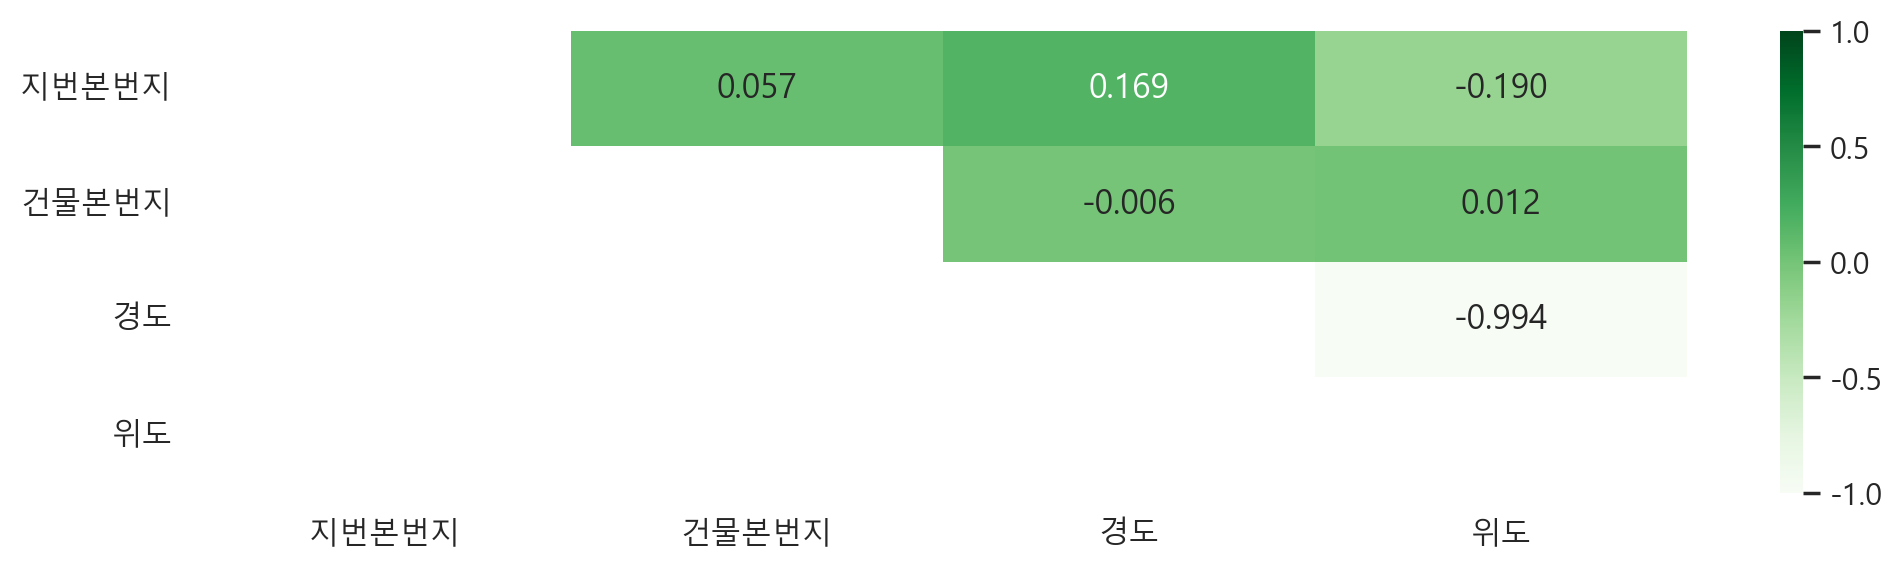

In [150]:
sns.heatmap(corr, annot=True, fmt='.3f', cmap='Greens', vmin=-1, vmax=1, mask=~mask)
plt.show()

# 9.	경도와 위도 컬럼을 이용하여 산점도

[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

## ①	X축에는 경도, y축에는 위도 컬럼을 산점도로 시각화

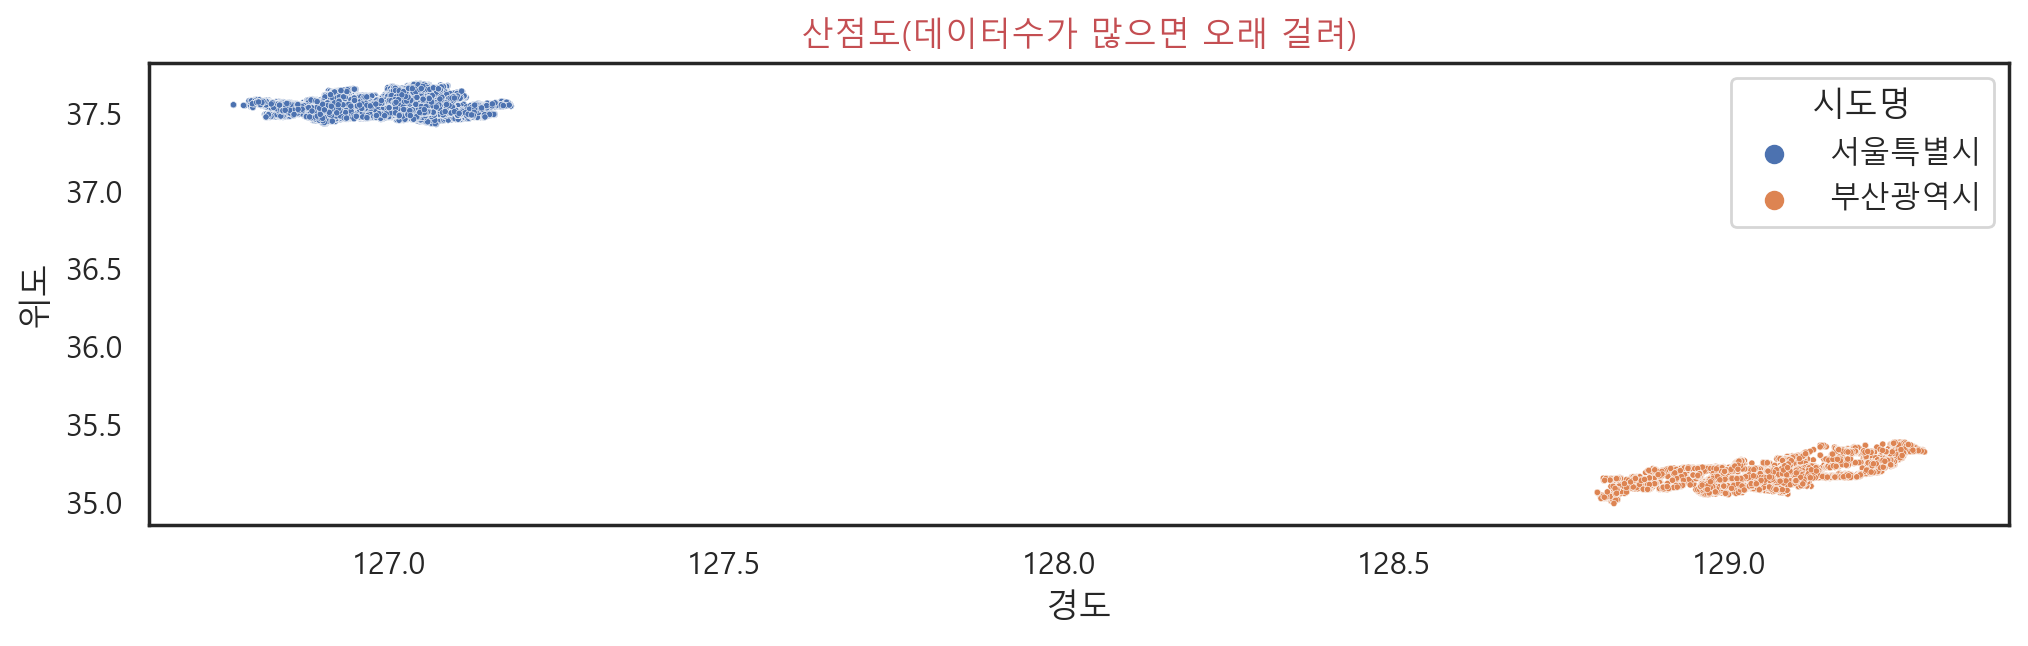

CPU times: total: 13.7 s
Wall time: 13.9 s


In [5]:
%%time
g = sns.scatterplot(data=df, x='경도', y='위도', hue='시도명', s=5)
g.set_title('산점도(데이터수가 많으면 오래 걸려)', color='r')
# g.set(title='산점도')
# plt.title('산점도(데이터수가 많으면 오래 걸려)', color='r')
plt.show()

## ②	경도와 위도의 산점도를 “시도명” 컬럼별로 서브플롯으로 시각화

In [7]:
df['시도명'].unique(), len(df)

(array(['서울특별시', '부산광역시'], dtype=object), 696054)

In [6]:
# 시도명별 데이터 비율
df['시도명'].value_counts() / len(df)

서울특별시    0.776545
부산광역시    0.223455
Name: 시도명, dtype: float64

In [9]:
# 임의로 1% 추출후, 시도명별 데이터 비율
df_sample = df.sample(frac=0.01)
df_sample['시도명'].value_counts() / len(df_sample)

서울특별시    0.779055
부산광역시    0.220945
Name: 시도명, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
df_99, df_sample = train_test_split(df,
                    test_size=0.01,
                    stratify=df['시도명'])
print(df_99.shape, df_sample.shape)

(689093, 16) (6961, 16)


In [13]:
df_sample['시도명'].value_counts() / len(df_sample)

서울특별시    0.776613
부산광역시    0.223387
Name: 시도명, dtype: float64

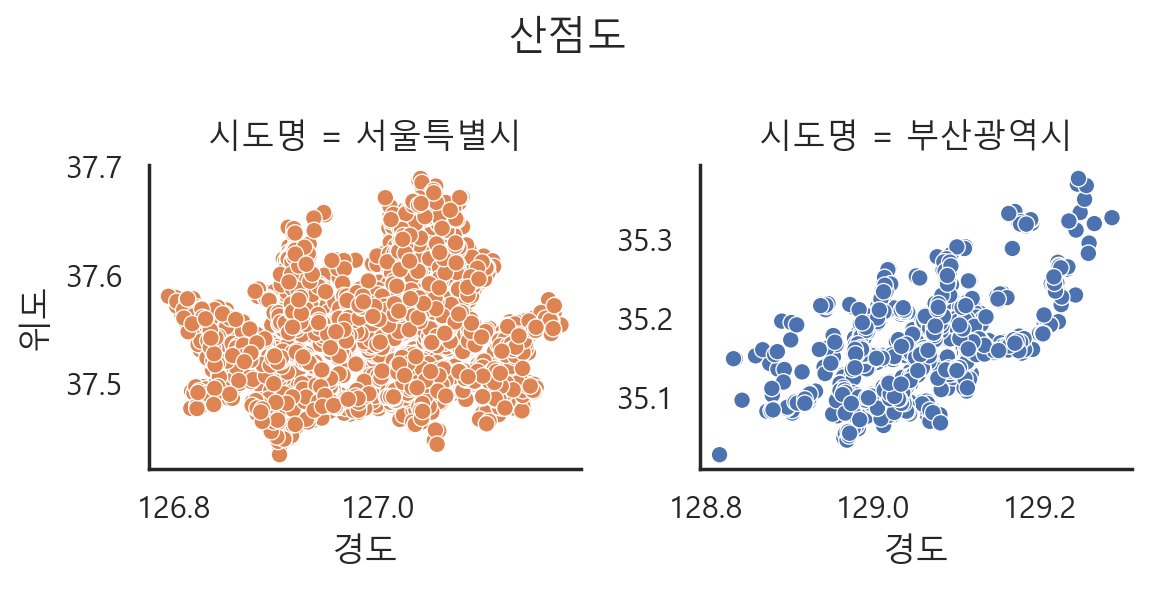

In [30]:
g = sns.relplot(data=df_sample, x="경도", y="위도", hue="시도명",
           # kind="scatter",
           col="시도명",
           col_order=['서울특별시','부산광역시'],
           facet_kws={'sharex':False, 'sharey':False},
           height = 3, # 세로
           aspect = 1,  # 가로(비율)
           legend=False) # 범례 안 보이게
# g.fig.set_size_inches(12,4)
plt.suptitle('산점도')
plt.tight_layout() # layout 배치 다시 조정

## ③ 위의 1번에서 시각화된 산점도를 바탕으로 회귀선을 그린다.

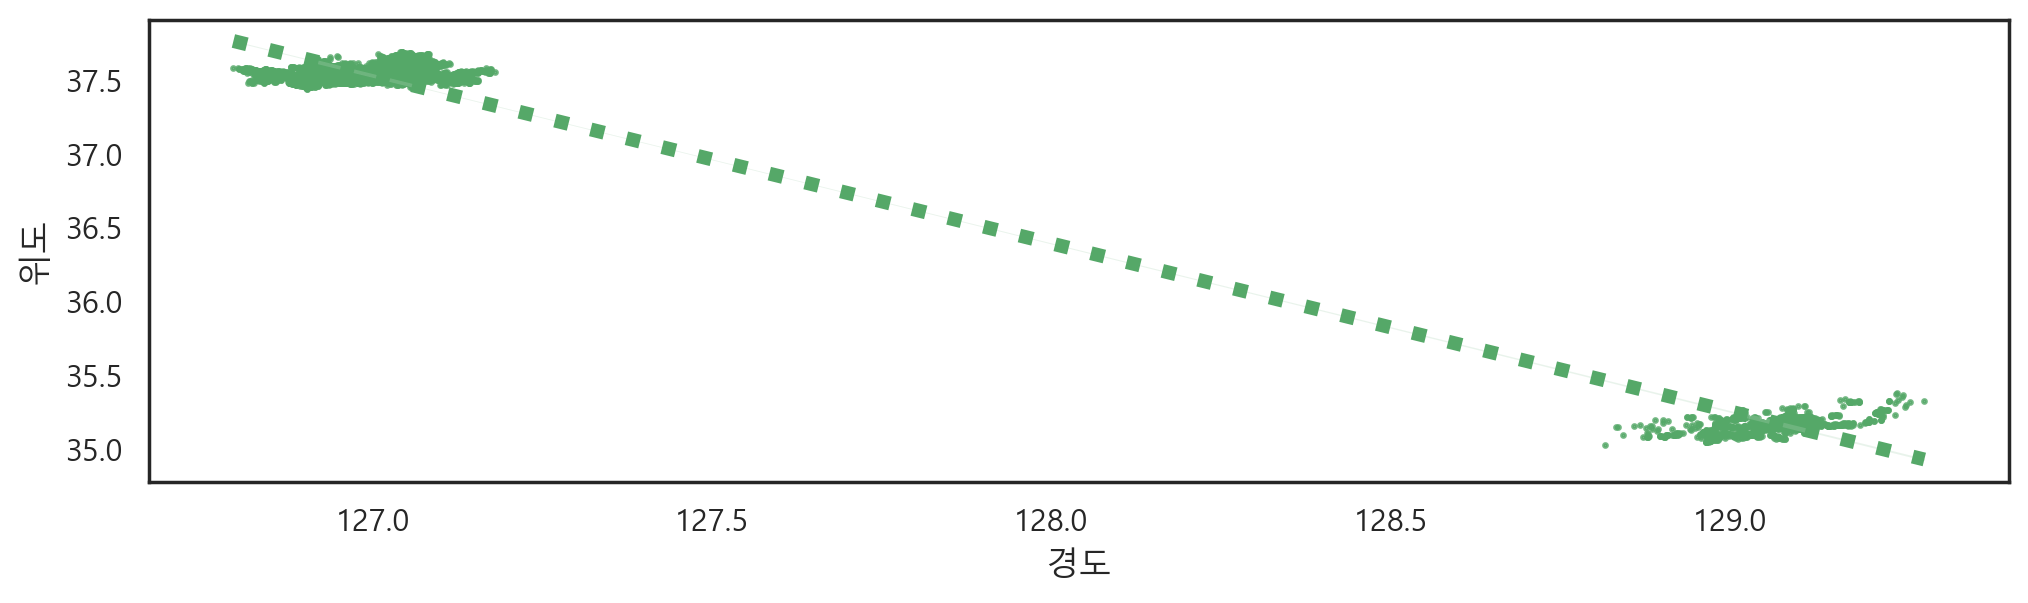

In [37]:
sns.regplot(data=df_sample, x="경도", y="위도",
           scatter_kws={'s':2, 'color':'g'},
           line_kws={'linewidth':5, 'color':'g', 'linestyle':':'})
plt.show()

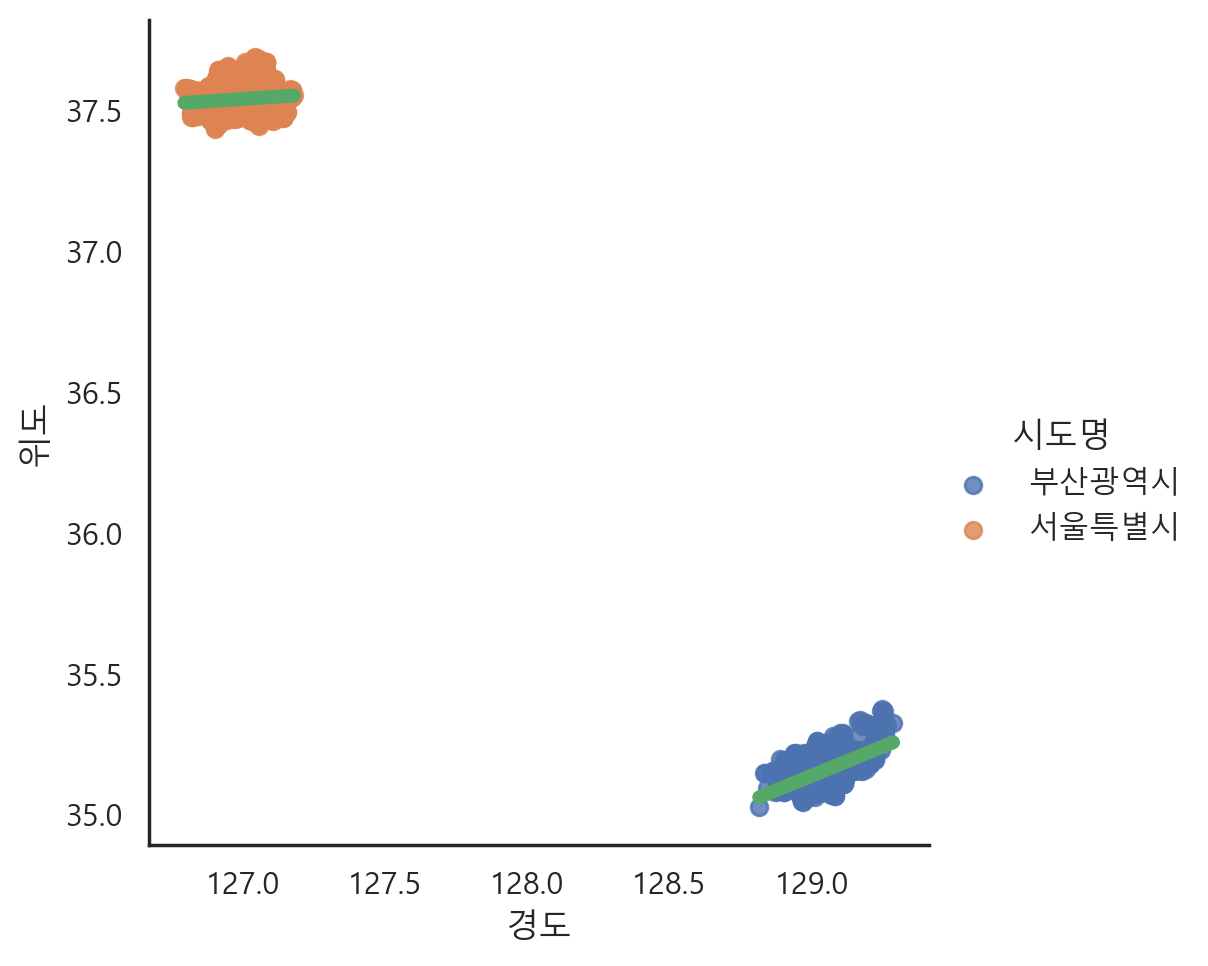

In [42]:
sns.lmplot(data=df_sample, x="경도", y="위도", hue='시도명',
          line_kws={'linewidth':5, 'color':'g'})
plt.show()

## ④ 위의 2번에서 시각화된 산점도를 바탕으로 회귀선을 서브 플롯으로 그린다.

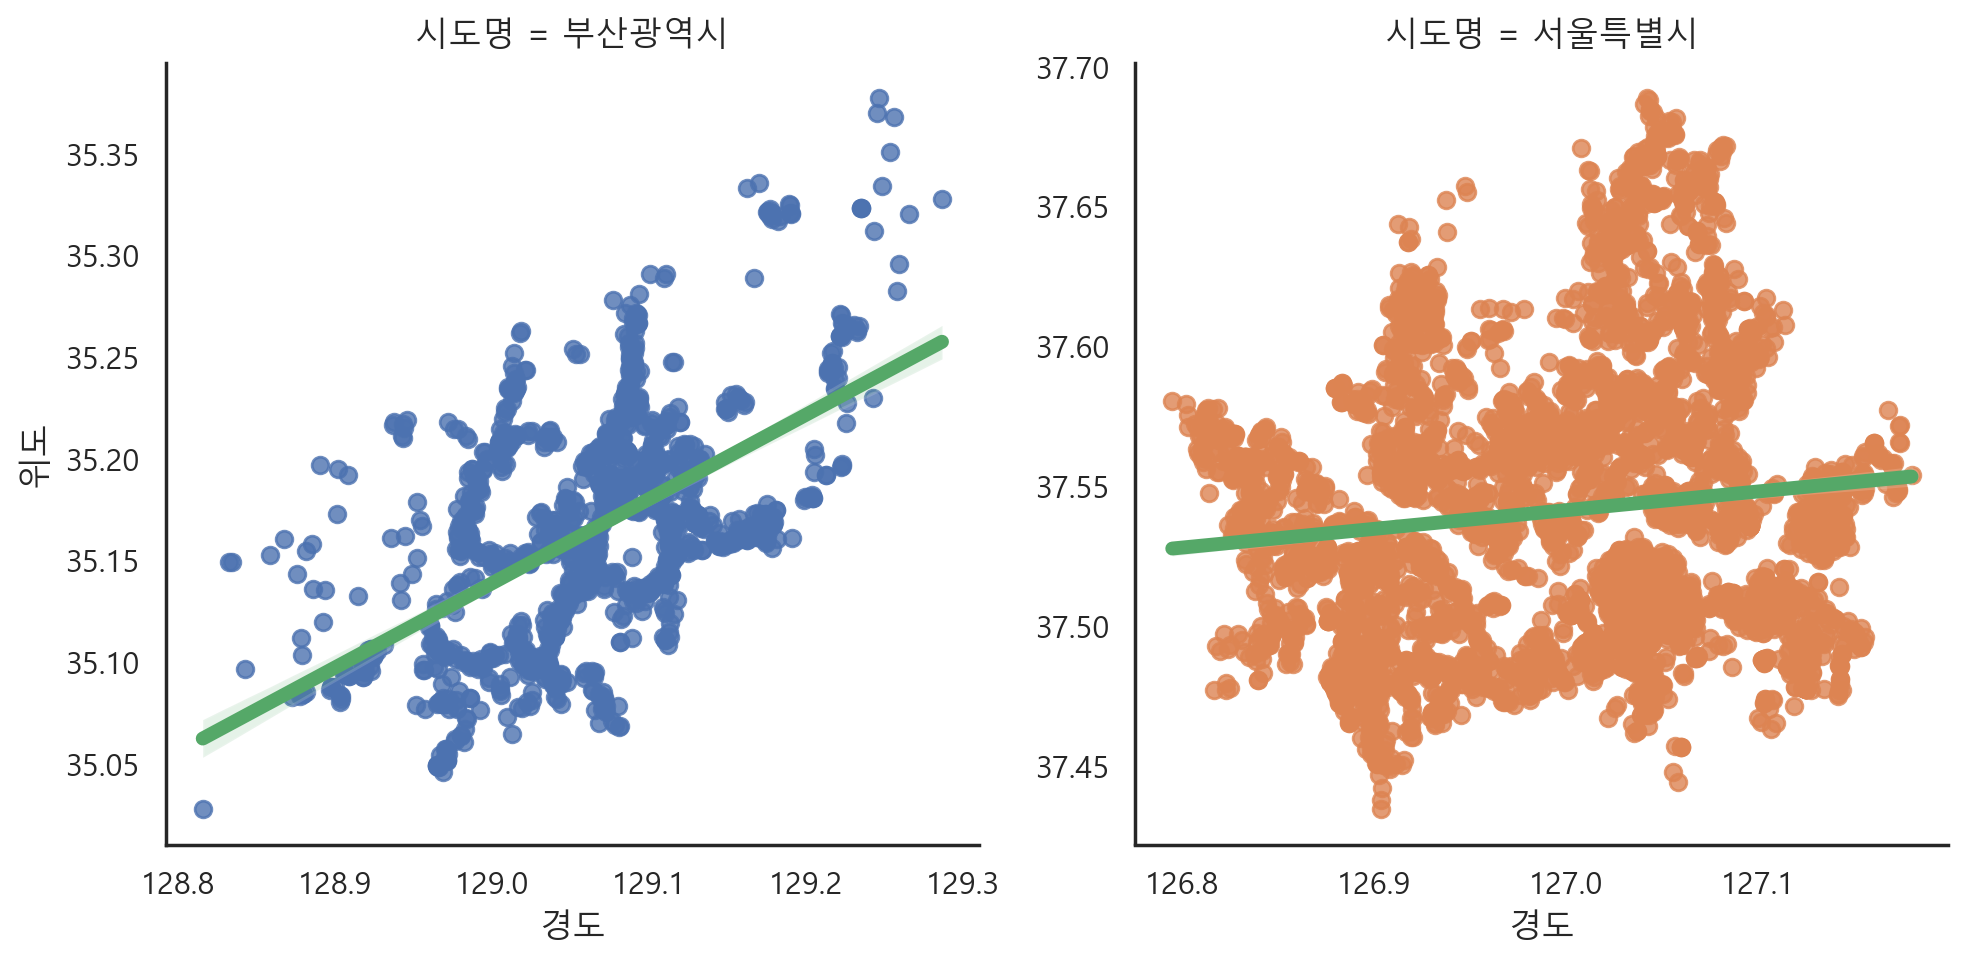

In [44]:
sns.lmplot(data=df_sample, x="경도", y="위도", hue='시도명',
          line_kws={'linewidth':5, 'color':'g'},
          col='시도명',
          facet_kws={'sharex':False, 'sharey':False})
plt.show()

# 10. 상권업종대분류명별 상호명의 개수를 도출하고 시각화하기

In [45]:
df['상권업종대분류명'].unique()

array(['음식', '부동산', '소매', '수리·개인', '과학·기술', '예술·스포츠', '시설관리·임대', '교육',
       '숙박', '보건의료'], dtype=object)

In [46]:
# 상호명이 결측치인 데이터 수
df['상호명'].isna().sum()

1

In [47]:
# 상호명이 결측치인 데이터
df[df['상호명'].isna()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
548763,NaN,소매,섬유·의복·신발 소매,신발 소매업,부산광역시,부산진구,부전2동,부전동,대지,573.0,부산광역시 부산진구 부전동 573-1,부산광역시 부산진구 중앙대로,717.0,부산광역시 부산진구 중앙대로 717,129.059138,35.155237


In [56]:
# 상권업종대분류명별 상호명의 개수 : 
    # groupby(결과가 시리즈, 데이터프레임), pivot_talbe(데이터프레임)
df.groupby('상권업종대분류명')['상호명'].count()
result = pd.pivot_table(df, index='상권업종대분류명', values='상호명', aggfunc='count')

In [54]:
# 상권업종대분류명별 데이터 갯수 : 
 # groupby(시리즈,데이터프레임), pivot_table(데이터프레임), value_counts(시리즈, 정렬)
df.groupby('상권업종대분류명')[['위도']].count()
df.pivot_table(index='상권업종대분류명', values='위도', aggfunc='count')
df['상권업종대분류명'].value_counts()

음식         193508
소매         151969
과학·기술      107216
수리·개인       71012
교육          52404
부동산         30940
시설관리·임대     30466
예술·스포츠      26408
보건의료        20758
숙박          11373
Name: 상권업종대분류명, dtype: int64

# 11. 상권업종대분류명이 음식인 서브셋을 이용한 분석
## ① “상권업종대분류명”이 음식인 서브셋을 변수 df_food에 할당하고 확인


## ②	“상권업종대분류명”이 음식이면서, "시군구명”이 강남구 데이터만 가져와 “상권업종중분류명”별로 빈도수를 구함(loc함수를 이용 vs loc함수 이용안함)

# 12.df 데이터셋에서 “상권업종대분류명”이 음식인 데이터 중 서울특별시 데이터 서브셋
- https://seaborn.pydata.org/tutorial/categorical.html : 범주형그래프
## ①	“상권업종대분류명”이 음식인 서브셋 중 서울특별시 데이터만 변수 df_seoul_food에 할당하고 확인


## ② df_seoul_food 데이터 셋을 시군구명, 상권업종중분류명으로 그룹화하여 상점수를 count한 내용을 food_gu 변수에 할당. 

## ③	food_gu 변수를 다음과 같은 스타일의 표로 출력(food_gu 이용).

## ④ 위 3번 스타일의 표를 pivot_table함수를 이용하여 출력

## ⑤ 3번의 결과 중 강남구 데이터만 뽑아 barplot으로 시각화(판다스 plot이용)

## ⑥ 3번 food_gu를 seaborn을 이용하여 구별 음식점 상호 개수를 시각화

## ⑦ 상권업종중분류명별 음식점 상호갯수

## ⑧	Seaborn의 catplot을 이용하여 상권업종중분류별 음식점을 구별로 시각화(서브플롯으로 시각화)

https://seaborn.pydata.org/tutorial/categorical.html

## ⑨	Seaborn의 catplot을 이용하여 구별 음식점을 상권업종중분류명별로 서브 플롯으로 시각화

# 13.	구별로 학원수 비교 : 서울 대치동이나 목동에 사교육이 발달되었다는 가설을 뒷받침할 수 있는 분석
## ① 서울시 교육(상권업종대분류명 이용) 데이터를 df_academy 변수에 할당하고 확인


## ②	df_academy 데이터 셋을 상호명별로 빈도수 출력(value_counts()함수 이용하거나 groupby이용)

## ③ df_academy 데이터 셋을 상호명별로 빈도수 상위 10개 출력

## ④ df_academy 데이터 셋을 시군구명 별로 빈도수 출력(학원이 가장 많은 구부터 출력)

## ⑤df_academy 데이터 셋에서 어떤 종류의 학원들이 많은지 상위10개만 academy_count변수에 할당하고 출력(상권업종소분류명 컬럼 이용)

## ⑥ df_academy 데이터셋에서 상권업종소분류명별로 빈도수를 구했을 때 빈도가 1000이상인 데이터만 따로 academy_count_1000변수에 할당

## ⑦ df_academy 데이터셋을 “시군구명”, "상권업종소분류명” 별 상호명 빈도수를 academy_group 변수에 할당 출력

## ⑧ academy_group 데이터셋에서 강남구 데이터만 출력 및 시각화(barplot)

## ⑨ df_academy데이터 중 “법정동명”컬럼이 “대치동”과 “목동”인 데이터만 가져와 상권업종소분류명별 빈도수 출력

## ⑩“상권업종소분류명”별 "시군구명” 별 상호명 빈도수를 g변수에 할당하고 출력

## ⑪ g변수의 내용중 "상권업종소분류명” 컬럼이 “입시·교과학원”데이터만 시각화(pandas의 plot.bar, pandas의 barh, seaborn의 barplot)

# 14. 서울시 데이터만 경도와 위도를 산점도로 시각화
## ① df_academy 데이터셋의 경도와 위도를 “시군명”별로 색상을 다르게 scatterplot으로 시각화


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

## ② df_academy 데이터셋의 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

## ③ df_academy 데이터셋 중 “입시·교과학원” 데이터만, 경도와 위도를 “시군구명”별로 색상을 다르게 scatterplot으로 시각화

## ④ df_academy 데이터셋 중 “태권도/무술학원” 데이터만, 경도와 위도를 “시군명”별로 색상을 다르게 scatterplot으로 시각화

## ⑤ df_academy 데이터셋 중 “입시·교과학원” 데이터와 “태권도/무술학원” 데이터만, 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

# 15. 지도시각화 : Folium
` 아나콘다 프롬프트에서 아래의 둘 중 하나를 실행`

`pip install folium`

`conda install -c conda-forge folium`

-	docs : https://python-visualization.github.io/folium/latest/getting_started.html?utm_source=chatgpt.com
-	Quickstart : https://python-visualization.github.io/folium/version-v0.9.1/quickstart.html?utm_source=chatgpt.com
